# Latar Belakang



Sebuah perusahaan yang bergerak di bidang transportasi milik pemerintah daerah yakni `TransJakarta`, ingin merekrut *data scientist*. Perusahaan ini ingin meningkatkan efisiensi, memperbaiki kualitas layanan, dan mendukung visi serta misinya dalam menyediakan transportasi yang memudahkan dan membahagiakan warga Jakarta. 

`TransJakarta`, sebagai sistem bus rapid transit (BRT) terbesar di dunia, memiliki peran penting dalam mendukung mobilitas masyarakat Jakarta. Dengan visinya **"Menghubungkan Kehidupan Jakarta"** dan misinya untuk **menyediakan layanan transportasi terintegrasi yang memudahkan dan membahagiakan, TransJakarta terus berupaya meningkatkan kualitas layanan di tengah pertumbuhan kota yang pesat**.

Untuk mencapai hal ini, analisis data perjalanan dan transaksi pengguna menjadi kunci. Data seperti rute, pemberhentian, waktu perjalanan, dan profil penumpang dapat memberikan wawasan mendalam terkait kebutuhan penumpang, pola perjalanan, serta efisiensi rute. Dengan menganalisis data tersebut, TransJakarta dapat mengoptimalkan rute, meningkatkan fasilitas di pemberhentian ramai, dan menyesuaikan layanan dengan kebutuhan demografis pengguna.

Melalui analisis yang tepat, TransJakarta dapat meningkatkan operasional, mempersingkat waktu perjalanan, dan meningkatkan kepuasan pengguna. Data ini menjadi dasar penting untuk mendukung keberlanjutan transportasi publik yang lebih baik di Jakarta.

# Pernyataan Masalah



Meskipun TransJakarta telah menjadi tulang punggung transportasi publik di Jakarta, masih terdapat berbagai tantangan dalam menyediakan layanan yang efektif, efisien, dan memuaskan bagi semua penggun`. Seiring dengan meningkatnya jumlah penumpang dan perluasan jaringan rute, TransJakarta perlu mengoptimalkan operasionalnya untuk memenuhi kebutuhan mobilitas masyarakat dengan lebih baik. 

Dengan analisis terkait pola perjalanan penumpang, preferensi rute, waktu perjalanan, serta demografi pengguna yang dapat digunakan sebagai dasar pengambilan keputusan strategis dengan tujuan mencegah masalah seperti ketidakseimbangan alokasi armada di rute-rute tertentu, ketidaknyamanan pengguna akibat kapasitas yang tidak memadai, dan durasi perjalanan yang tidak efisien. Oleh karena itu, diperlukan analisis data yang lebih mendalam untuk `efisiensi, memperbaiki kualitas layanan, dan mendukung visi serta misinya dalam menyediakan transportasi yang memudahkan dan membahagiakan warga Jakarta`.

# Gambaran Umum Analisis


Untuk mencari gambaran umum data tersebut dapat dianalisis terlebih dahulu dari:
1. **Mengidentifikasi Pola Perjalanan Penumpang:** Menganalisis rute dan pemberhentian yang paling sering digunakan untuk memahami kebutuhan mobilitas masyarakat dan mengoptimalkan distribusi armada bus.
  
2. **Menganalisis Demografi Pengguna:** Menggunakan data demografis seperti usia, jenis kelamin, dan frekuensi perjalanan untuk segmentasi pengguna serta menyesuaikan layanan dengan kebutuhan spesifik tiap kelompok.
  
3. **Mengevaluasi Efisiensi Waktu Perjalanan:** Menganalisis data waktu tap in dan tap out untuk mengetahui durasi perjalanan penumpang, mengidentifikasi waktu sibuk, dan mengoptimalkan jadwal keberangkatan.

4. **Menilai Kinerja dan Kapasitas Pemberhentian:** Mengidentifikasi stasiun atau pemberhentian yang sering digunakan dan memerlukan peningkatan fasilitas atau manajemen kapasitas.

5. **Memonitor Pendapatan dari Transaksi:** Menganalisis data pembayaran untuk memahami kontribusi pendapatan dari berbagai rute dan mengukur dampak perubahan tarif terhadap jumlah penumpang.

6. **Mengembangkan Strategi Peningkatan Layanan:** Menggunakan temuan analisis untuk merancang kebijakan yang meningkatkan kepuasan pengguna, seperti program loyalitas, insentif bagi penumpang setia, atau penyesuaian rute.

# Tujuan Analisis



Setelah mendapatkan gambaran umum data yang sudah dianalisis selanjutnya adalah kembali ketujuan utama yakni menjawab pernyataan masalah. DImana Analisis ini bertujuan membantu TransJakarta meningkatkan `efisiensi, memperbaiki kualitas layanan, dan mendukung visi serta misinya dalam menyediakan transportasi yang memudahkan dan membahagiakan warga Jakarta` dengan:

**1. Mengefisienkan tempat TapIn dan Tapout yang kurang dilewati penumpang dan mengoptimalkan tempat TapIn dan TapOut yang sering dilewati penumpang**

**2. Memperbaiki kualitas layanan dengan menjamin kenyamanan dan keamanan penumpang wanita dan menyesuaikan fasilitas Halte TransJakarta**

**3. Mendukung visi serta misi TransJakarta disesuaikan berdasarkan usia penumpang dan biayanya**


`Visi Transjakarta`
- Menghubungkan Kehidupan Jakarta

`Misi TransJakarta`
- Bersama-sama menyediakan layanan transportasi terintegrasi yang memudahkan dan membahagiakan kehidupan Jakarta.

# Data


Untuk menjawab pertanyaan di atas, kita akan menganalisa data penumpang transjakarta yang sudah dikumpulkan. Dataset dapat diakses [di sini](https://drive.google.com/drive/folders/1S04hk5uHfHYe6J1S6fVqDunuja1Lk1Lo). 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi informasi terkait penumpang transjakarta. Ada 22 kolom di dalam dataset transjakarta, yaitu: 
- **transID**: ID transaksi unik untuk setiap transaksi
- **payCardID**: Identitas utama pelanggan. Kartu yang digunakan pelanggan sebagai tiket untuk masuk dan keluar.
- **payCardBank**: Nama bank penerbit kartu pelanggan
- **payCardName**: Nama pelanggan yang tertera pada kartu.
- **payCardSex**: Jenis kelamin pelanggan yang tertera pada kartu
- **payCardBirthDate**: Tahun kelahiran pelanggan
- **corridorID**: ID koridor / ID rute sebagai kunci untuk pengelompokan rute.
- **corridorName**: Nama koridor / Nama rute yang berisi titik awal dan akhir untuk setiap rute.
- **direction**: 0 untuk Pergi, 1 untuk Kembali. Arah rute.
- **tapInStops**: ID Pemberhentian Masuk (tap in) untuk mengidentifikasi nama pemberhentian
- **tapInStopsName**: Nama Pemberhentian Masuk (tap in) tempat pelanggan melakukan tap in.
- **tapInStopsLat**: Garis Lintang dari Pemberhentian Masuk
- **tapInStopsLon**: Garis Bujur dari Pemberhentian Masuk
- **stopStartSeq**: Urutan pemberhentian, pemberhentian pertama, pemberhentian kedua, dll. Terkait dengan arah.
- **tapInTime**: Waktu tap in. Tanggal dan waktu
- **tapOutStops**: ID Pemberhentian Keluar (tap out) untuk mengidentifikasi nama pemberhentian
- **tapOutStopsName**: Nama Pemberhentian Keluar (tap out) tempat pelanggan melakukan tap out.
- **tapOutStopsLat**: Garis Lintang dari Pemberhentian Keluar
- **tapOutStopsLon**: Garis Bujur dari Pemberhentian Keluar
- **stopEndSeq**: Urutan pemberhentian, pemberhentian pertama, pemberhentian kedua, dll. Terkait dengan arah.
- **tapOutTime**: Waktu tap out. Tanggal dan waktu
- **payAmount**: Jumlah yang dibayar pelanggan. Beberapa gratis, beberapa tidak.

In [2]:
df = pd.read_csv("Transjakarta.csv")
pd.set_option('display.max_columns', None)
display(df.head(),df.tail())

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,Adam Malik,-6.236466,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


## Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi umur dari dataset transjakarta.

In [3]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (37900, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-nul

- Jumlah Baris : 37.900
- Jumlah Kolom : 22
- Tipe Data:
    - object (string): 12 kolom
    - int64: 3 kolom
    - float64: 7 kolom



In [4]:
display(df.describe(), df.describe(include='object'))

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-25 06:23:00,P00016,BKN,2023-04-10 19:10:15
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


In [5]:
pd.set_option('display.max_colwidth', None)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SBPQ144H4S45RA, ZYRL615G4C05RD, MEFW094B7A84RS, ZJVI960B9I42DA, RJPK085I1K65HR, TFIO518N2X54UT, SYLN486U0E02TA, BECP746A8C28NV, KYNP204W3G29VA, MSFD430X8W13TO, MKND874X1D96HF, LFYJ535S2I30DP, TCKQ601Q5O01BC, KQIA358G2N38CX, RANO576G1J87EO, NZCE828E4J23AW, OFPJ170M5O75AP, LKXU174O1E59EP, AXTN077R7Z77JM, WQXL397G5U61OY, RLLZ887W3V14WZ, JJEK861K6E37KF, UANX737M9L25GI, VUWZ891M7I57EB, CXLW459Z3A28RD, AQPU510X2X44PT, BRUT293K1O98GA, MMEX885R3T18QL, UNFK619O2R74DX, FTGY161E2O14MG, ELVU605Z3W26IF, KPDA909R2T72GD, GIHF067H1Y81IV, IXJW013G5W79VX, PKAM574R5S22UG, IQBJ843C4G34DE, SRIX686S0S08SW, MLTY652D7F29HW, NICD824U6H93DE, YEOK544W1J67OX, OPNL705D9K64FN, KHKM512K0T88LD, RHUT145C1U25ZY, TWAK265Z0M88QR, JQIF022K9P74RM, MQCN972F9X71NY, KINJ335N6L86YT, TDIY341Y5S79UU, TFRA396G6W78PD, GXOP506G9B61EP, XESL868N6A66XN, IVHH403J9T51JH, OTGH855B8A29BP, YJMS457L2O20JF, NNAE999Q4V92XM, UCMI767D7M79GS, ZHFN555D9L05LU, WHTZ386I9S44YF, VHUC320U1S58CB, DBWI728C0M55ND, HHCJ093F0W41XK, JUNS207R4F95UA, LFIW578V8Y12XO, GYVC538M6B25WO, QRFR658M6P01AH, TKQW976R2D32RY, PCGM443G2W62OB, PEGV120E5W96OH, BUQT197K3D65PN, UNSO267V8F26WP, RHCN069U6G42WD, QMHC825R0K38KM, WGRY331M3O87VE, TKRV681O2S46RW, ELFD362R2U94NT, YYXK265F5N59SE, ZGJG301G9Z71AR, KNSE319Q1P35CC, RMJF585F2W51BQ, KFYK655N1H73XS, WTBE175B2A58NC, SVRH922T8G79FY, ...]"
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 213155822653833, 3587341902618993, 6510013988638519, 3580401035990896, 5541851157087967, 347204308990092, 3536759468239783, 6575130739600630, 4056836188316, 4532407180860336, 4556326832434362836, 4969284110642, 502034641014, 5430018591726410, 378872365541693, 343851798729291, 676293109036, 213191293100137, 2295833910329055, 4968156435384914, 676367323901, 4384653483539395, 213155309116759, 4682220924642, 3589380857722689, 4394677357168120, 4905734029265594, 379334845079777, 346910704516122, 2247096843683316, 675990206087, 639040388584, 4947438345710982, 3539535695881465, 574726750023, 344303671677311, 3544931989278653, 4017802962833960, 5465310774429054, 347394043585982, 4723250872219869, 3545499820365948, 2718070346782735, 342531623551844, 349944373495091, 4428582927102421723, 566171543168, 213121690546749, 3527853482331808, 5542490449138301, 4380875529452127, 4172238784006231, 340065298083181, 4268640600849949, 4290559479079, 213155263532652, 4294484188649274, 180057903365395, 3551174827324245, 340858239719917, 3569562588766630, 180016859215889, 373945281501952, 5134532253940704, 3549158005951908, 379764016867073, 4189640459822695962, 4766007569419196, 3576239635494729, 587887634588, 567286069354, 4097122165824, 378851219912235, 180022972730457, 2237440645700724, 6011162006507240, 4730280883020443501, 3505707886664931, 4450403105752326, 4074114259011835374, 4000041838802, 4112330548313, 30583455954585, 3537543297101185, 2720484776954605, 3570422408611549, 2291402671071407, 676172975739, 180020791350481, 502072062834, 30385017224303, 6590854673757012, 4963710913075879668, 213104805015669, ...]"
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, R. Devi Hariyah, S.T., Darmanto Rajasa, Cagak Maheswara, S.Sos, T. Dadap Pradana, M.Ak, Oskar Widiastuti, S.Farm, R.M. Labuh Laksmiwati, Shakila Maryadi, Danuja Usada, Nadine Utami, H. Lutfan Nurdiyanti, Sari Nababan, Hj. Ophelia Haryanti, S.Sos, Adikara Kurniawan, S.Sos, Karna Waskita, Aslijan Irawan, Garang Utama, Fathonah Saefullah, Darman Purwanti, Taufik Farida, Martana Suartini, Eluh Nugroho, Cut Hana Maulana,

Secara umum, kita bisa melihat bahwa:
* dataset transjakarta memiliki 22 kolom dan 37.900 baris
* beberapa kolom, yaitu, `corridorID`, `corridorName`, `tapInStops`, `tapOutStops`, `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, `tapOutTime` dan `payAmount` memiliki data kosong. Data kosong pada kolom-kolom tersebut diwakili dengan data NaN.
* kolom `transID` berisikan id unik untuk tiap penumpang transjakarta, sehingga penumpang akan mendapatkan transID baru setiap menaiki tranjakarta yang pertama atau yang kesekian kalinya.
* kolom `payCardID` dan `stopEndSeq` memiliki data tipe numerik. Dari penjelasannya, kolom ini seharusnya berisikan data object dengan tujuan agar bisa dianalisis sebagai primary key atau foreign key.
* kolom `payCardBirthDate`, `tapInTime`, `tapOutTime` memiliki data tipe object. Dari penjelasannya, kolom ini seharusnya berisikan data datetime dengan tujuan agar bisa dianalisis sebagai patokan waktu.
* kolom `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, `tapOutTime` memiliki data kosong yang jumlahnya sama diperkirakan bahwa data dengan kosong dalam kolom tersebut adalah data yang sama jadi bisa dihapuskan nilai/value yang kosong.

## Missing Value

In [6]:
pd.DataFrame({
    'Missing Values': df.isna().sum(),
    'Percentage': ((df.isna().sum() / len(df)) * 100).round(2).astype(str) + '%'
})

,Missing Values,Percentage
transID,0,0.0%
payCardID,0,0.0%
payCardBank,0,0.0%
payCardName,0,0.0%
payCardSex,0,0.0%
payCardBirthDate,0,0.0%
corridorID,1257,3.32%
corridorName,1930,5.09%
direction,0,0.0%
tapInStops,1213,3.2%


<Axes: >

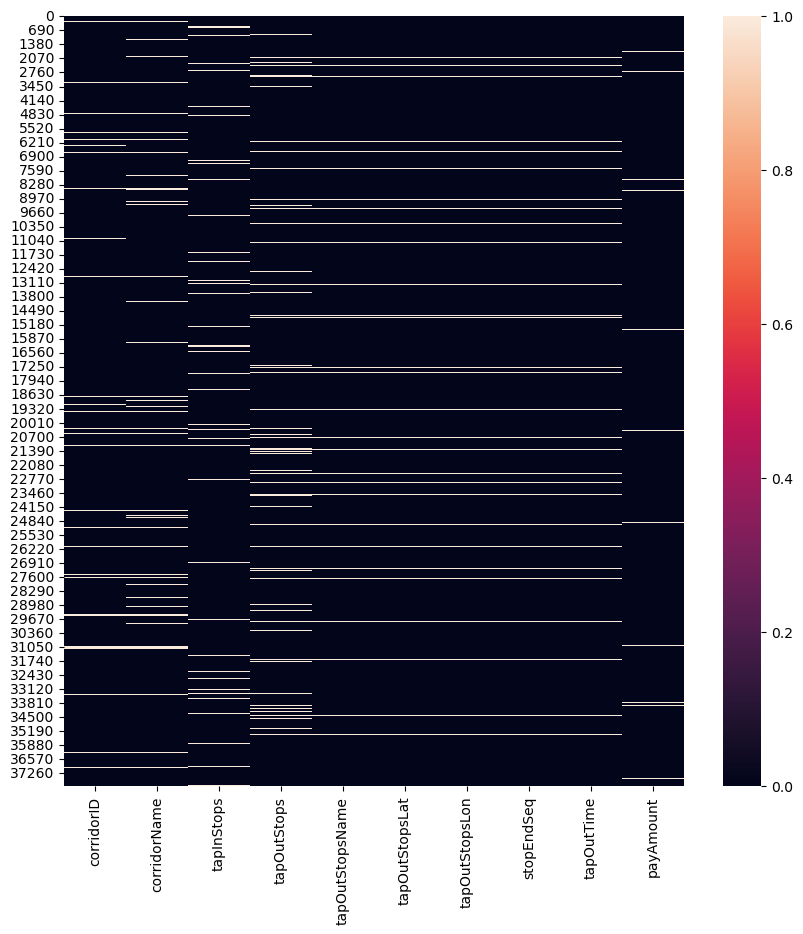

In [7]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[['corridorID','corridorName','tapInStops','tapOutStops','tapOutStopsName','tapOutStopsLat','tapOutStopsLon','stopEndSeq',"tapOutTime", "payAmount"]].isna())

Secara garis besar:  
* *missing value* di kolom semua kolom memiliki proporsi yang cukup rendah (<10%), dengan missing value terbesar ada di kolom `tapOutStops` mencapai 6.04%.
* *missing value* di kolom `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, dan `tapOutTime` memiliki sebaran yang terlihat berkaitan, karena memiliki jumlah missing value yang sama.  

Ada 2 cara untuk menangani *missing value*:
* pertama, menghapus baris/kolom yang berisi *missing value*. Cara ini bisa dilakukan, karena jumlah *missing value* di kolom `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, dan `tapOutTime` memiliki jumlah missing value yang sama dan saling berkaitan.
* kedua, mengisi data yang hilang. Cara ini lebih disarankan. Ada beberapa metode yang bisa digunakan untuk mengisi missing value, cara yang paling baik adalah dengan mengisi data yang hilang dengan nilai sebenarnya, atau sedekat mungkin dengan nilai asli. Dalam kasus ini, kita akan mencoba mengisi *missing value* berdasarkan kolom lain yang secara domain knowledge atau secara statistik berkaitan dengan kolom yang memiliki *missing value*. Jika masih ada kolom yang tidak bisa diisi, barulah kita mengisi dengan angka *mean, median* atau *modus*. Menghapus data akan menjadi opsi terakhir.

Kita sudah melihat gambaran kasar anomali di dalam data kita, sekarang, mari kita lihat dan tangani tiap-tiap anomali secara lebih jauh. 

In [8]:
# 1. Mengubah payCardID menjadi string
df['payCardID'] = df['payCardID'].astype(str)

# 2. Mengubah payCardBirthDate menjadi datetime diibratakan tanggal lahir 1 januari disetiap tahunnya
df['payCardBirthDate'] = pd.to_datetime(df['payCardBirthDate'], format='%Y')

# 3. Mengubah tapInTime dan tapOutTime menjadi datetime
df['tapInTime'] = pd.to_datetime(df['tapInTime'], format='%Y-%m-%d %H:%M:%S')
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'], format='%Y-%m-%d %H:%M:%S')

# 4. Mengubah stopEndSeq menjadi string
df['stopEndSeq'] = df['stopEndSeq'].astype(str)

# 5. Mengubah stopStartSeq menjadi string
df['stopStartSeq'] = df['stopStartSeq'].astype(str)

# 6. Mengubah stopStartSeq menjadi string
df['direction'] = df['direction'].astype(str)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           37900 non-null  object        
 1   payCardID         37900 non-null  object        
 2   payCardBank       37900 non-null  object        
 3   payCardName       37900 non-null  object        
 4   payCardSex        37900 non-null  object        
 5   payCardBirthDate  37900 non-null  datetime64[ns]
 6   corridorID        36643 non-null  object        
 7   corridorName      35970 non-null  object        
 8   direction         37900 non-null  object        
 9   tapInStops        36687 non-null  object        
 10  tapInStopsName    37900 non-null  object        
 11  tapInStopsLat     37900 non-null  float64       
 12  tapInStopsLon     37900 non-null  float64       
 13  stopStartSeq      37900 non-null  object        
 14  tapInTime         3790

### `1. corridorID` dan `corridorName`

In [10]:
# jumlah missing value di kolom 'corridorID' dan 'corridorName'
df[['corridorID', 'corridorName']].isna().sum()

corridorID      1257
corridorName    1930
dtype: int64

Terdapat 1257 data kosong di kolom `corridorID` dan 1930 di kolom `corridorName`.

Dilihat dari data, kita sudah tau bahwa *missing value* corridorID dan corridorName saling berkaitan, dimana nilai corridorID akan sama dengan nilai corridorID. Maka, kita akan memutuskan cara pengisian kedua kolom ini secara bersamaan.  

Mengisi missing value dari kolom `corridorID` berdasarkan `corridorName`, dan sebaliknya



In [11]:
df['corridorID'] = df['corridorID'].fillna(df.groupby('corridorName')['corridorID'].transform(lambda x: x.fillna(x.mode()[0])))
df['corridorName'] = df['corridorName'].fillna(df.groupby('corridorID')['corridorName'].transform(lambda x: x.fillna(x.mode()[0])))

In [12]:
# jumlah missing value di kolom 'corridorID' dan 'corridorName'
df[['corridorID', 'corridorName']].isna().sum()

corridorID      1125
corridorName    1125
dtype: int64

Ternyata data yang terisi hanya sedikit dikarenakan banyak data yang memiliki missing value pada kolom `corridorID` dan `corridorName`. Maka setelah melihat data bahwa penumpang dilihat dari `payCardName` seringkali bahkan selalu menaiki transjakarta dengan `corridorID` dan `corridorName` yang sama maka dapat dihasilkan bahwa `payCardName`, `corridorID`, dan `corridorName` saling berkaitan.

Sehingga pengisian missing value dari kolom `corridorID` dan `corridorName` bisa berdasarkan dari `payCardName`

In [13]:
# penumpang selalu menaiki transjakarta dengan `corridorID` dan `corridorName` yang sama
df_Bajragin_Usada = df[df["payCardName"] == "Bajragin Usada"]
df_Darmanto_Rajasa = df[df["payCardName"] == "Darmanto Rajasa"]
display(df_Bajragin_Usada[["payCardName","corridorID","corridorName"]],df_Darmanto_Rajasa[["payCardName","corridorID","corridorName"]])

,payCardName,corridorID,corridorName
0,Bajragin Usada,5,Matraman Baru - Ancol
300,Bajragin Usada,5,Matraman Baru - Ancol
600,Bajragin Usada,5,Matraman Baru - Ancol
900,Bajragin Usada,5,Matraman Baru - Ancol
1200,Bajragin Usada,5,Matraman Baru - Ancol
1500,Bajragin Usada,5,Matraman Baru - Ancol
1800,Bajragin Usada,5,Matraman Baru - Ancol
2100,Bajragin Usada,5,Matraman Baru - Ancol
2400,Bajragin Usada,5,Matraman Baru - Ancol
2700,Bajragin Usada,5,Matraman Baru - Ancol


,payCardName,corridorID,corridorName
7,Darmanto Rajasa,NaN,NaN
307,Darmanto Rajasa,JAK.03,Lebak Bulus - Andara
607,Darmanto Rajasa,JAK.03,Lebak Bulus - Andara
907,Darmanto Rajasa,JAK.03,Lebak Bulus - Andara
1207,Darmanto Rajasa,JAK.03,Lebak Bulus - Andara
1507,Darmanto Rajasa,JAK.03,Lebak Bulus - Andara
1807,Darmanto Rajasa,JAK.03,Lebak Bulus - Andara
2107,Darmanto Rajasa,JAK.03,Lebak Bulus - Andara
2407,Darmanto Rajasa,JAK.03,Lebak Bulus - Andara
2707,Darmanto Rajasa,JAK.03,Lebak Bulus - Andara


In [14]:
# Mengisi nilai corridorID dan corridorName yang kosong berdasarkan payCardName jika ada data yang memiliki corridorID dan corridorName berarti penumpang tersebut baru sekali menaiki transjakarta

# Mengisi nilai corridorID yang kosong berdasarkan payCardName
df['corridorID'] = df.groupby('payCardName')['corridorID'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

# Mengisi nilai corridorName yang kosong berdasarkan payCardName
df['corridorName'] = df.groupby('payCardName')['corridorName'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))


In [15]:
# jumlah missing value di kolom 'corridorID' dan 'corridorName'
df[['corridorID', 'corridorName']].isna().sum()

corridorID      5
corridorName    5
dtype: int64

jika masih ada data yang memiliki missing value berarti ada kemungkinan bahwa penumpang tersebut baru sekali menaiki transjakarta

In [16]:
# daftar penumpang yang baru sekali naik transjakarta
df_Kezia = df[df["payCardName"] == "Kezia Hutagalung"]
df_Tari = df[df["payCardName"] == "Tgk. Tari Wibowo"]
df_Ulva = df[df["payCardName"] == "Ulva Namaga"]
df_Murti = df[df["payCardName"] == "Murti Simanjuntak, M.Farm"]
df_Saka = df[df["payCardName"] == "Saka Wijaya, S.H."]
display(df_Kezia,df_Tari,df_Ulva,df_Murti,df_Saka)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37626,WTBE997C8K47UG,4087484815419236202,brizzi,Kezia Hutagalung,F,1993-01-01,NaN,NaN,1.0,B05316P,SMKN 4,-6.141156,106.95555,42,2023-04-15 10:08:50,B02642P,Ps. Malaka Rorotan,-6.13998,106.95493,43.0,2023-04-15 11:02:37,0.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37689,ZVAU363K8Z72QF,4235440226938980,dki,Tgk. Tari Wibowo,F,1989-01-01,NaN,NaN,1.0,P00014,Bermis,-6.178203,106.89859,23,2023-04-28 19:01:21,P00192,Pulo Gadung 1,-6.183239,106.90907,24.0,2023-04-28 21:23:44,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37727,MGBX067C2V69EZ,213145593134816,emoney,Ulva Namaga,F,1995-01-01,NaN,NaN,1.0,P00146,Pangeran Jayakarta,-6.137611,106.81792,6,2023-04-16 17:38:14,P00092,Jembatan Merah,-6.146731,106.83427,9.0,2023-04-16 18:14:25,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37770,RGLG273G3M96TE,4725638979751926133,brizzi,"Murti Simanjuntak, M.Farm",M,1988-01-01,NaN,NaN,1.0,P00076,Gunung Sahari Mangga Dua,-6.136817,106.83237,11,2023-04-16 09:06:33,P00141,Pakin,-6.127982,106.80474,25.0,2023-04-16 11:14:06,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37838,GTLM961T1U29JA,4204405669287580,dki,"Saka Wijaya, S.H.",M,1995-01-01,NaN,NaN,1.0,B03520P,Sbr. Gg. Damai Lingkar Timur 2,-6.195348,106.94385,12,2023-04-28 12:30:26,B04078P,Sbr. Masjid Pasmar Marunda,-6.115928,106.95189,64.0,2023-04-28 13:59:57,0.0


Kelima data yang masih kosong dikarenakan penumpang tersebut baru sekali menaiki transjakarta. Karena hanya ada 5 data, dan memang tidak bisa diisi, maka data akan dihapus.

In [17]:
# menghapus data yang "corridorName", "corridorID"	 kosong
df = df.dropna(subset=["corridorName", "corridorID"])

In [18]:
# jumlah missing value di kolom 'corridorID' dan 'corridorName'
df[['corridorID', 'corridorName']].isna().sum()

corridorID      0
corridorName    0
dtype: int64

Sekarang, data `corridorID` dan `corridorName` yang kosong sudah tidak ada.

### `2. tapInStops` dan `tapOUTStops`

Dilihat dari data, kita sudah tau bahwa *missing value* `tapInStops` dan `tapInStopsName` saling berkaitan, serta `tapOutStops` dan `tapOutStopsName` saling berkaitan, dimana nilai tapInStops akan sama dengan nilai tapInStopsName dan tapOutStops akan sama dengan nilai tapOutStopsName. Maka, akan diputuskan cara pengisian kedua kolom ini secara bersamaan.  

Mengisi missing value dari kolom `tapInStops` berdasarkan `tapInStopsName`, dan `tapOutStops` berdasarkan `tapOutStopsName`.

In [19]:
df['tapInStops'] = df.groupby('tapInStopsName')['tapInStops'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)

df['tapOutStops'] = df.groupby('tapOutStopsName')['tapOutStops'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)

In [20]:
df[['tapInStops', 'tapOutStops', 'tapOutStopsName']].isna().sum()

tapInStops           34
tapOutStops        1363
tapOutStopsName    1344
dtype: int64

bisa dilihat bahwa kolom `tapInStops` bisa terisi cukup banyak namun kolom `tapOutStops` masih mempunyai missing value yang banyak itu berarti untuk kolom `tapOutStops` tidak terpaku pada `tapOutStopsName` atau bisa jadi banyak data yang berisikan bernilai Nan dari kedua kolom tersebut.

### `3. payAmount`

In [21]:
# jumlah missing value di kolom payAmount dan value dari payAmount
df[['payAmount']].isna().sum(), df['payAmount'].unique()

(payAmount    1007
 dtype: int64,
 array([ 3500., 20000.,     0.,    nan]))

Dilihat dari data,`payAmount` memiliki 3 harga yakni 20000, 3500, dan 0 atau gratis. Dilihat dari data bahwa *missing value* `payAmount` dan `corridorID` saling berkaitan, dimana harga penumpang berdasarkan dengan jenis bus/coridorIdnya. Namun ada kriteria bagi penumpang tidak usah membayar ongkos transjakarta, diantaranya:
- Lansia (Usia 60 tahun ke atas)
- Penyandang Disabilitas
- Pelajar SD, SMP, dan SMA
- Petugas Pelayanan Publik
- Program Khusus Pemerintah

In [22]:
# mengisi payAmount berdasarkan modus pengroupan dengan corridorID
df['payAmount'] = df.groupby('corridorID')['payAmount'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)

In [23]:
# jumlah missing value di kolom payAmount 
df[['payAmount']].isna().sum()

payAmount    914
dtype: int64

ternyata masih ada payAmount yang masih kosong, maka dilihat data apa saja yang kosong dilihat dari corridorIdnya

In [24]:
# Menampilkan baris dengan payAmount yang NaN berdasarkan corridorID
na_payamount_by_corridor = df[df['payAmount'].isna()].groupby('corridorID').size()

na_payamount_by_corridor

corridorID
JAK.48A    255
JAK.48B    163
M1H        176
M7B        320
dtype: int64

Setelah melakukan pengecekan data `corridorID` dan `corridorName`pada webside transjakarta dan sumber lainnya ternyata terdapat kesalahan nama pada `corridorID` yakni corridorID dari M1H seharusnya M1 dan M7B seharusnya M7

In [25]:
# Mengubah corridorID dari M1H menjadi M1 dan M7B menjadi M7
df['corridorID'] = df['corridorID'].replace({'M1H': '1H', 'M7B': '7B'})

Setelah mengganti nama corridorID dan mencari tau ongkos jenis corridorID yang berawalan **JAK** adalah 0 atau gratis dan ongkos jenis corridorID **1H** dan **7B** adalah 3500 maka data `corridorID` akan disesuaikan dengan `payAmount`

In [26]:
def set_pay_amount_zero(pay):
    if pay['corridorID'] in ['JAK.48A', 'JAK.48B']:
        return 0.0
    elif pay['corridorID'] in ['1H', '7B']:
        return 3500.0
    return pay['payAmount']

# mengubah nilai payAmount berdasarkan corridorID
df['payAmount'] = df.apply(set_pay_amount_zero, axis=1)


In [27]:
# jumlah missing value di kolom payAmount 
df[['payAmount']].isna().sum()

payAmount    0
dtype: int64

Sekarang, data `payAmount` yang kosong sudah tidak ada.

### 4. Menghapus missing value `tapOutStopsName, tapOutStopsLat, tapOutStopsLon, dan stopEndSeq`

In [28]:
df[['tapOutStopsName', 'tapOutStopsName','tapOutStopsLat','tapOutStopsLon',"stopEndSeq",'tapOutTime']].isna().sum()

tapOutStopsName    1344
tapOutStopsName    1344
tapOutStopsLat     1344
tapOutStopsLon     1344
stopEndSeq            0
tapOutTime         1344
dtype: int64

In [29]:
# menghitung panjang missing value kolom tapOutStopsName, tapOutStopsLat, tapOutStopsLon, stopEndSeq
len(df[df["tapOutStopsName"].isna() & df["tapOutStopsLat"].isna() & df["tapOutStopsLon"].isna() & df["stopEndSeq"].isna() & df["tapOutTime"].isna()])

0

Bisa dilihat bahwa masing-masing nilai missing value dari kolom `tapOutStopsName, tapOutStopsLat, tapOutStopsLon, dan stopEndSeq` memiliki nilai yang sama.

Jika dibandingkan dengan panjang missing value pada data yang kolom `tapOutStopsName, tapOutStopsLat, tapOutStopsLon, stopEndSeq` kosong sama dengan masing-masing missing value semua kolom.

Maka dapat disimpulkan bahwa data kosong dalam kolom tersebut adalah data yang sama jadi bisa dihapuskan nilai/value yang kosongnya.

In [30]:
# menghapus data yang tapOutStopsName, tapOutStopsLat, tapOutStopsLon, dan stopEndSeq kosong
df = df.dropna(subset=["tapOutStopsName", "tapOutStopsLat",'tapOutStopsLon','stopEndSeq'])

In [31]:
df[['tapOutStopsName', 'tapOutStopsName','tapOutStopsLat','tapOutStopsLon',"stopEndSeq",'tapOutTime']].isna().sum()

tapOutStopsName    0
tapOutStopsName    0
tapOutStopsLat     0
tapOutStopsLon     0
stopEndSeq         0
tapOutTime         0
dtype: int64

Sekarang, data `tapOutStopsName, tapOutStopsLat, tapOutStopsLon, dan stopEndSeq` yang kosong sudah tidak ada.

### 5. Menghapus missing value `tapInStops dan tapOutStops`

In [32]:
df[['tapInStops', 'tapOutStops']].isna().sum()

tapInStops     32
tapOutStops    19
dtype: int64

In [33]:
# Pengecekan missing value data tapOutStops dan tapInStops
mv_tapinout = df[df["tapInStops"].isna() & df["tapOutStops"].isna()]
# Pengecekan missing value data tapInStops
mv_tapino = df[df["tapInStops"].isna()].head()
# Pengecekan missing value data tapOutStops
mv_taput = df[df["tapOutStops"].isna()].head()

display(mv_tapinout,mv_tapino,mv_taput)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
33424,ONZF587U9M08JU,3536572066357562,dki,Vivi Salahudin,F,1990-01-01,JAK.117,Tanjung Priok - Tanah Merdeka,1.0,NaN,Simpang Jln. Kramat Jaya 2,-6.108692,106.91742,1,2023-04-22 15:16:20,NaN,Masjid Al Waqof,-6.110646,106.91733,2.0,2023-04-22 15:54:34,0.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
32365,GFXI432F3W42KE,342872650777880,emoney,Carla Maryati,F,2006-01-01,S11,BSD - Jelambar,0.0,NaN,Bundaran Alam Sutera 1,-6.244107,106.64889,16,2023-04-09 19:53:59,B02990P,Pratama Abadi,-6.233124,106.64256,19.0,2023-04-09 20:17:31,3500.0
32533,SJEG609E5A77VR,3511593949794788,dki,Humaira Maryadi,F,1992-01-01,12B,Pluit - Senen,1.0,NaN,Graha Sindu Bpk Penabur,-6.159971,106.83509,8,2023-04-09 18:46:36,B00122P,Baywalk 2,-6.110359,106.77961,41.0,2023-04-09 19:36:31,3500.0
32572,OHMY262Z9S32VK,3531560183774236,dki,Kiandra Nashiruddin,M,1993-01-01,JAK.58,Cilincing - Rorotan,1.0,NaN,Rusun Rorotan 2,-6.149932,106.95478,0,2023-04-08 06:45:49,B05328P,SMKN Jasalena Marunda,-6.127384,106.95669,24.0,2023-04-08 07:10:38,0.0
32663,DKJP886D8B30GD,4225751347437323699,brizzi,Hj. Dewi Firmansyah,M,1978-01-01,JAK.115,Term. Tj. Priok - Pegangsaan II IGI,0.0,NaN,Jln. Pinang 1,-6.114470,106.90319,7,2023-04-09 21:44:28,B00381P,Gading Nirwana,-6.148645,106.91295,28.0,2023-04-09 22:42:32,0.0
32768,AMRU195J1Q27AC,3582791887979981,dki,Tgk. Keisha Hutasoit,M,1973-01-01,6T,Pasar Minggu - Velbak,0.0,NaN,Fatmawati 1,-6.292571,106.79743,18,2023-04-16 07:07:32,B04808P,Simpang Gandaria Kyai Maja,-6.241860,106.79000,39.0,2023-04-16 07:48:30,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
32068,BXRQ766N7W94KH,3582791887979981,dki,Tgk. Keisha Hutasoit,M,1973-01-01,JAK.02,Kampung Melayu - Duren Sawit,0.0,B05022P,Simpang Otista III Utara,-6.231843,106.86776,2,2023-04-08 16:32:00,NaN,Jln. H. Yahya,-6.230219,106.87122,5.0,2023-04-08 17:20:01,0.0
32419,SRCX260G7J04ZB,343897458234312,emoney,Rahayu Prabowo,M,1973-01-01,JAK.75,Cililitan - Kp. Pulo,1.0,B03111P,RPTRA Kampung Pulo Asri,-6.277931,106.88373,0,2023-04-09 19:56:07,NaN,Sbr. Jl H Emuntipala I,-6.277035,106.87761,5.0,2023-04-09 20:31:15,0.0
32570,CSCL544U0W09DD,503837878738,flazz,Rahmi Lazuardi,M,1982-01-01,JAK.11,Tanah Abang - Kebayoran Lama,1.0,B05102P,Simpang Rawa Belong Palmerah Barat,-6.206630,106.78342,20,2023-04-08 08:55:05,NaN,Sbr. Ps. Pisang,-6.207759,106.79233,25.0,2023-04-08 09:14:01,0.0
32926,FOHO550C4G76FJ,3543024804143004,dki,R. Oni Lailasari,M,1996-01-01,JAK.49,Lebak Bulus - Cipulir,0.0,B00479P,Gg. H. Sanusi I Ulujami,-6.241758,106.76298,9,2023-04-15 11:36:25,NaN,Exit Tol Veteran Bintaro,-6.262649,106.76654,39.0,2023-04-15 13:04:15,0.0
32960,SLEX356F6M31TA,4713105079051022,dki,Gangsar Palastri,F,1984-01-01,JAK.64,Lenteng Agung - Aseli,1.0,B04556P,Sbr. TK Kartika VIII -13,-6.345264,106.82746,2,2023-04-16 09:06:57,NaN,MIN 8 Srengseng Sawah,-6.335943,106.82628,17.0,2023-04-16 10:59:28,0.0


Dilihat dari `tapOutStops` dan `tapInStops` data diatas bahwa diasumsikan penumpang turun tidak sesuai dengan tempatnya bisa turun dipinggir jalan atau belum sampai tempat pemberhentian semestinya jadi data tersebut bisa dihapuskan

In [34]:
df = df.dropna(subset=["tapInStops", "tapOutStops"])

In [35]:
df[['tapInStops', 'tapOutStops']].isna().sum()

tapInStops     0
tapOutStops    0
dtype: int64

Sekarang, data `tapInStops, tapOutStops` yang kosong sudah tidak ada.

In [36]:
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008-01-01,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997-01-01,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992-01-01,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978-01-01,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982-01-01,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36501 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           36501 non-null  object        
 1   payCardID         36501 non-null  object        
 2   payCardBank       36501 non-null  object        
 3   payCardName       36501 non-null  object        
 4   payCardSex        36501 non-null  object        
 5   payCardBirthDate  36501 non-null  datetime64[ns]
 6   corridorID        36501 non-null  object        
 7   corridorName      36501 non-null  object        
 8   direction         36501 non-null  object        
 9   tapInStops        36501 non-null  object        
 10  tapInStopsName    36501 non-null  object        
 11  tapInStopsLat     36501 non-null  float64       
 12  tapInStopsLon     36501 non-null  float64       
 13  stopStartSeq      36501 non-null  object        
 14  tapInTime         36501 non

## Penambahan dan Penyesuaian Data

### `1. payCardSex`
Merubah gender menjadi lebih mudah dipahami dari M menjadi Male, dan dari F menjadi Female

In [38]:
# Mengubah value payCardSex M menjadi Male, F menjadi Female
df['payCardSex'] = df['payCardSex'].replace({'M': 'Male', 'F': 'Female'})

###  `2. direction`
Merubah arah menjadi lebih mudah dipahami dari '1.0' menjadi 'Back' dan dari '0.0' menjadi 'Go'

In [39]:
# Mengubah value direction 1.0 menjadi Back, 0.0 menjadi Go
df['direction'] = df['direction'].replace({'1.0': 'Back', '0.0': 'Go'})

### `3. payCardAge`
Menambahkan kolom baru yakni payCardAge untuk mengetahui usia penumpang diambil dari `tapInTime` - `payCardBirthDate`

In [40]:
# Menghitung usia penumpang
df['payCardAge'] = df['tapInTime'].dt.year - df['payCardBirthDate'].dt.year

# Memasukkan kolom payCardAge ke indeks ke-6
df.insert(6, 'payCardAge', df.pop('payCardAge'))

### `4. payCardtitle`
Menambahkan kolom baru yakni payCardtitle untuk mengetahui gelar yang suka menggunakan transjakarta diambil berdasarkan nama gelar didepan atau belakang nama pengguna

In [41]:
import re

# Fungsi untuk mengidentifikasi gelar
def extract_gelar(name):
    if re.search(r'\bDr\.', name):
        return 'Doktor'    
    elif re.search(r'dr\.', name):
        return 'Dokter'
    elif re.search(r'drg\.', name):
        return 'Dokter'
    elif re.search(r'\bM\.\w+', name):
        return 'Magister'
    elif re.search(r'\bS\.\w+', name):
        return 'Sarjana'
    else:
        return "Doesn't have a title"

# Membuat kolom baru 'gelar' berdasarkan fungsi extract_gelar
df['payCardtitle'] = df['payCardName'].apply(extract_gelar)

# Memasukkan kolom payCardAge ke indeks ke-4
df.insert(4, 'payCardtitle', df.pop('payCardtitle'))

### `5. tripDuration`
Menambahkan kolom baru yakni tripDuration untuk mengetahui berapa lama waktu yang ditempuh menggunakan transjakarta diambil berdasarkan tapOutTime dikurang tapInTime

In [42]:
df['tripDuration'] = df['tapOutTime'] - df['tapInTime']

## Data yang sudah bersih

In [43]:
display(df.head(),df.tail())

,transID,payCardID,payCardBank,payCardName,payCardtitle,payCardSex,payCardBirthDate,payCardAge,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tripDuration
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,Doesn't have a title,Male,2008-01-01,15,5,Matraman Baru - Ancol,Back,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,0 days 00:39:09
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,Doesn't have a title,Female,1997-01-01,26,6C,Stasiun Tebet - Karet via Patra Kuningan,Go,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,0 days 00:57:17
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,Doesn't have a title,Female,1992-01-01,31,R1A,Pantai Maju - Kota,Go,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,0 days 00:51:49
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,Doesn't have a title,Female,1978-01-01,45,11D,Pulo Gebang - Pulo Gadung 2 via PIK,Go,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,0 days 00:43:25
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,Doesn't have a title,Male,1982-01-01,41,12,Tanjung Priok - Pluit,Go,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,0 days 00:39:28


,transID,payCardID,payCardBank,payCardName,payCardtitle,payCardSex,payCardBirthDate,payCardAge,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tripDuration
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,Doesn't have a title,Female,2004-01-01,19,6B,Ragunan - MH Thamrin via Semanggi,Back,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0,0 days 01:37:12
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,Doesn't have a title,Male,1974-01-01,49,9N,Pinang Ranti - Pramuka,Back,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0,0 days 00:35:51
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,Dokter,Female,1976-01-01,47,1T,Cibubur - Balai Kota,Back,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0,0 days 02:57:38
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,Doesn't have a title,Male,1976-01-01,47,JAK.13,Tanah Abang - Jembatan Lima,Back,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0,0 days 00:28:24
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,Dokter,Female,1985-01-01,38,13,Ciledug - Tendean,Go,P00001,Adam Malik,-6.236466,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0,0 days 00:26:41


In [44]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(36501, 25)


,dataFeatures,dataType,null,unique,uniqueSample
0,transID,object,0,36501,"[NHHB414D9Z45XE, KRZD952Q8X53NC]"
1,payCardID,object,0,1976,"[4314001786147604, 6011099919397345]"
2,payCardBank,object,0,6,"[brizzi, flazz]"
3,payCardName,object,0,1969,"[drg. Makara Safitri, M.Pd, Cut Salsabila Kurniawan]"
4,payCardtitle,object,0,5,"[Doesn't have a title, Dokter]"
5,payCardSex,object,0,2,"[Female, Male]"
6,payCardBirthDate,datetime64[ns],0,66,"[1974-01-01T00:00:00.000000000, 1948-01-01T00:00:00.000000000]"
7,payCardAge,int32,0,66,"[48, 63]"
8,corridorID,object,0,219,"[M13, 8A]"
9,corridorName,object,0,216,"[Rusun Marunda - Rusun Waduk Pluit, Cililitan - Kp. Pulo]"


Sebelum dibersihkan, memiliki 37.900 baris data, sekarang kita memiliki 36.501 baris. Sekitar 1400 baris data yang kosong dihapus, dan sisa data kosong diisi dengan data yang dirasa relevan. Untuk kolom sendiri ada penambahan yang asalnya 22 menjadi 25 dimana penambahan kolom tersebut bertujuan untuk mempermudah analisis


# Data Analysis


Setelah melakukan tahap _data cleaning_. Sekarang, bisa mulai melakukan analisis untuk **meningkatkan efisiensi, memperbaiki kualitas layanan, dan mendukung visi dan misi Transjakarta.**  

Analisis akan dilakukan dengan:
1. Menganalisis rute dan pemberhentian yang paling sering digunakan untuk memahami kebutuhan mobilitas masyarakat dan mengoptimalkan distribusi armada bus.  
2. Menggunakan data demografis seperti usia, jenis kelamin, dan frekuensi perjalanan untuk segmentasi pengguna serta menyesuaikan layanan dengan kebutuhan spesifik tiap kelompok. 
3. Menganalisis data waktu tap in dan tap out untuk mengetahui durasi perjalanan penumpang, mengidentifikasi waktu sibuk, dan mengoptimalkan jadwal keberangkatan.
4. Mengidentifikasi stasiun atau pemberhentian yang sering digunakan dan memerlukan peningkatan fasilitas atau manajemen kapasitas.
5. Menganalisis data pembayaran untuk memahami kontribusi pendapatan dari berbagai rute dan mengukur dampak perubahan tarif terhadap jumlah penumpang.
6. Menggunakan temuan analisis untuk merancang kebijakan yang meningkatkan kepuasan pengguna, seperti program loyalitas, insentif bagi penumpang setia, atau penyesuaian rute.


## Uji Korelasi


Tujuannya adalah untuk mengetahui seberapa kuat dan arah hubungan antar variabel tersebut. Korelasi dapat membantu dalam berbagai analisis data, terutama dalam memahami pola, tren, dan potensi hubungan sebab-akibat.

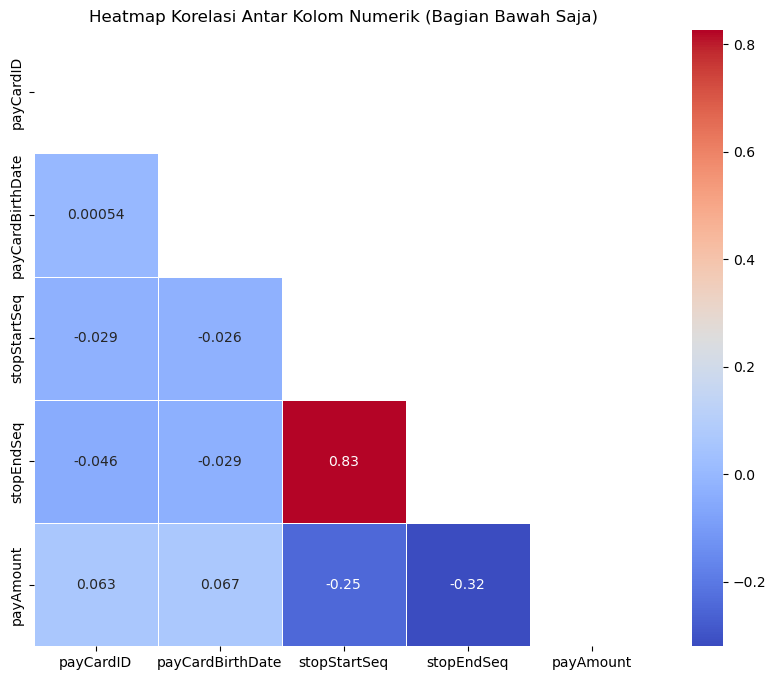

In [45]:
# Memilih hanya kolom numerik
numerical_columns = ['payCardID', 'payCardBirthDate', 'stopStartSeq', 'stopEndSeq', 'payAmount']

# Membuat DataFrame hanya dengan kolom numerik
df_numerical = df[numerical_columns]

# Menghitung matriks korelasi
correlation_matrix = df_numerical.corr()

# Membuat mask untuk bagian atas
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Menampilkan matriks korelasi dengan heatmap hanya bagian bawah
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, mask=mask)
plt.title("Heatmap Korelasi Antar Kolom Numerik (Bagian Bawah Saja)")
plt.show()

Berdasarkan heatmap korelasi yang ditampilkan:
- Hubungan yang kuat antara koordinat `stopStartSeq` dan `stopEndSeq` menunjukkan bahwa jika pemberhentian mulai meningkat, pemberhentian akhir juga meningkat.
- Sebagian besar variabel lainnya, terutama yang terkait dengan **pembayaran (payAmount)** tidak menunjukkan korelasi kuat dengan variabel lain, menunjukkan bahwa faktor-faktor ini mungkin tidak berkaitan erat dengan lokasi atau arah perjalanan.
- Secara keseluruhan, analisis ini membantu mengidentifikasi hubungan antarvariabel, terutama yang terkait dengan lokasi dan sekuens perjalanan penumpang.

## Mencari outlier


Tujuan untuk mengidentifikasi nilai-nilai yang secara signifikan berbeda dari mayoritas data. 

In [46]:
# Mencari outlier menggunakan metode IQR pada kolom payAmount
Q1 = df['payAmount'].quantile(0.25)
Q3 = df['payAmount'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mendapatkan outlier
outliers = df[(df['payAmount'] < lower_bound) | (df['payAmount'] > upper_bound)]

print(f"Jumlah outlier pada kolom payAmount: {len(outliers)}")


Jumlah outlier pada kolom payAmount: 1687


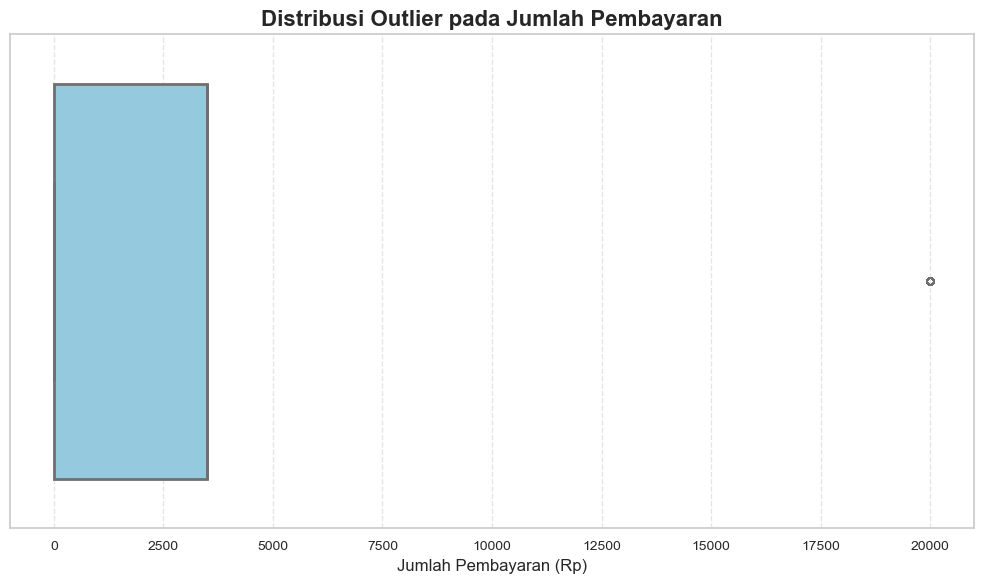

In [47]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Custom palette & boxplot
sns.boxplot(
    x=df['payAmount'],
    color="skyblue", 
    fliersize=5,      # ukuran outlier
    linewidth=2
)

plt.title('Distribusi Outlier pada Jumlah Pembayaran', fontsize=16, fontweight='bold')
plt.xlabel('Jumlah Pembayaran (Rp)', fontsize=12)
plt.xticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Terdapat outlier sebanyak 1.687 yang sangat jauh dari mayoritas data yakni pembayaran sebesar 20.000.

In [48]:
df["payAmount"].unique()

array([ 3500., 20000.,     0.])

Dilihat dari kolom `payAmount` ternyata variasi pembayaran hanya 3 jenis yakni 3.500, 20.000, dan 0/gratis dapat diambil kesimpulan bahwa outlier tersebut tidak bisa dihapuskan dan akan dipakai dalam analisis data

## Analisis Umum Keadaan Data

### 1. Menganalisis rute dan pemberhentian yang paling sering digunakan untuk memahami kebutuhan mobilitas masyarakat dan mengoptimalkan distribusi armada bus. 

Tujuan: Memahami pola perjalanan masyarakat dan mengoptimalkan distribusi armada bus.

untuk memahami pola perjalanan masyarakat dan mengoptimalkan distribusi armada bus bisa dicari dengan pengelompokan kolom `tapInStopsName` dan `transID` yang akan menghasilkan frekuensi dari tap in dan out para penumpang berdasarkan tempatnya.

In [49]:
# Menghitung frekuensi tap in per pemberhentian
tabin = df.groupby('tapInStopsName')[['transID']].count().sort_values('transID',ascending=False).reset_index()
tabin

,tapInStopsName,transID
0,Penjaringan,235
1,Garuda Taman Mini,203
2,BKN,163
3,BNN LRT,150
4,Pejaten,146
...,...,...
2517,Gracious,1
2518,Jln. Olahraga I Raya Condet,1
2519,Jln. Otista III Komplek IV,1
2520,Sbr. Masjid Jami Al Badariah Kemayoran,1


In [50]:
# Menampilkan top dan bootom dari tab in
top_tabin = tabin.head(10)
bottom_tabin = tabin.tail(10)
display(top_tabin,bottom_tabin)

,tapInStopsName,transID
0,Penjaringan,235
1,Garuda Taman Mini,203
2,BKN,163
3,BNN LRT,150
4,Pejaten,146
5,Penggilingan,129
6,Cibubur Junction,127
7,Rusun Kapuk Muara,125
8,Seskoal,123
9,Tendean,122


,tapInStopsName,transID
2512,Sbr. Masjid Al Iman Cipinang,1
2513,Graha Werdatama Pondok Labu,1
2514,Ps. Kam 1,1
2515,Ps. Jongkok,1
2516,Ps. Jabon Meruya,1
2517,Gracious,1
2518,Jln. Olahraga I Raya Condet,1
2519,Jln. Otista III Komplek IV,1
2520,Sbr. Masjid Jami Al Badariah Kemayoran,1
2521,Yos Sudarso Kodamar,1


Penjaringan, Garuda Taman Mini, BKN merupakan tempat tabInStop terbanyak, dan masih banyak tempat tabInStop yang hanya sekali dipakai oleh para penumpang

In [51]:
# Menghitung frekuensi tap out per pemberhentian
tabout = df.groupby('tapOutStopsName')[['transID']].count().sort_values('transID',ascending=False)
tabout

,transID
tapOutStopsName,
BKN,316
Penjaringan,265
Term. Senen,196
Monas,167
Term. Kampung Rambutan,164
...,...
Sbr. Ps. Kaget Pengadegan,1
Jln. Aneka Elok 2,1
Jln. Satria,1


In [52]:
# menampilkan top dan bottom tab out
top_tabout = tabout.head(10)
bottom_tabout = tabout.tail(10)
display(top_tabout,bottom_tabout)

,transID
tapOutStopsName,
BKN,316
Penjaringan,265
Term. Senen,196
Monas,167
Term. Kampung Rambutan,164
Kejaksaan Agung,159
Ragunan,151
Pinang Ranti,146
Pluit,131


,transID
tapOutStopsName,
Puskesmas Kelurahan Pademangan Timur,1
Sbr. Ps. Deprok,1
Sbr. Ps. Hipli Semanan,1
Sbr. Ps. Jelambar Polri,1
Jln. Sandratex 1,1
Sbr. Ps. Kaget Pengadegan,1
Jln. Aneka Elok 2,1
Jln. Satria,1
Jln. Sepakat,1


BKN, Penjaringan, dan Term. Senen merupakan tempat tapOutStops terbanyak, dan masih banyak tempat tapOutStops yang hanya sekali dipakai oleh para penumpang.

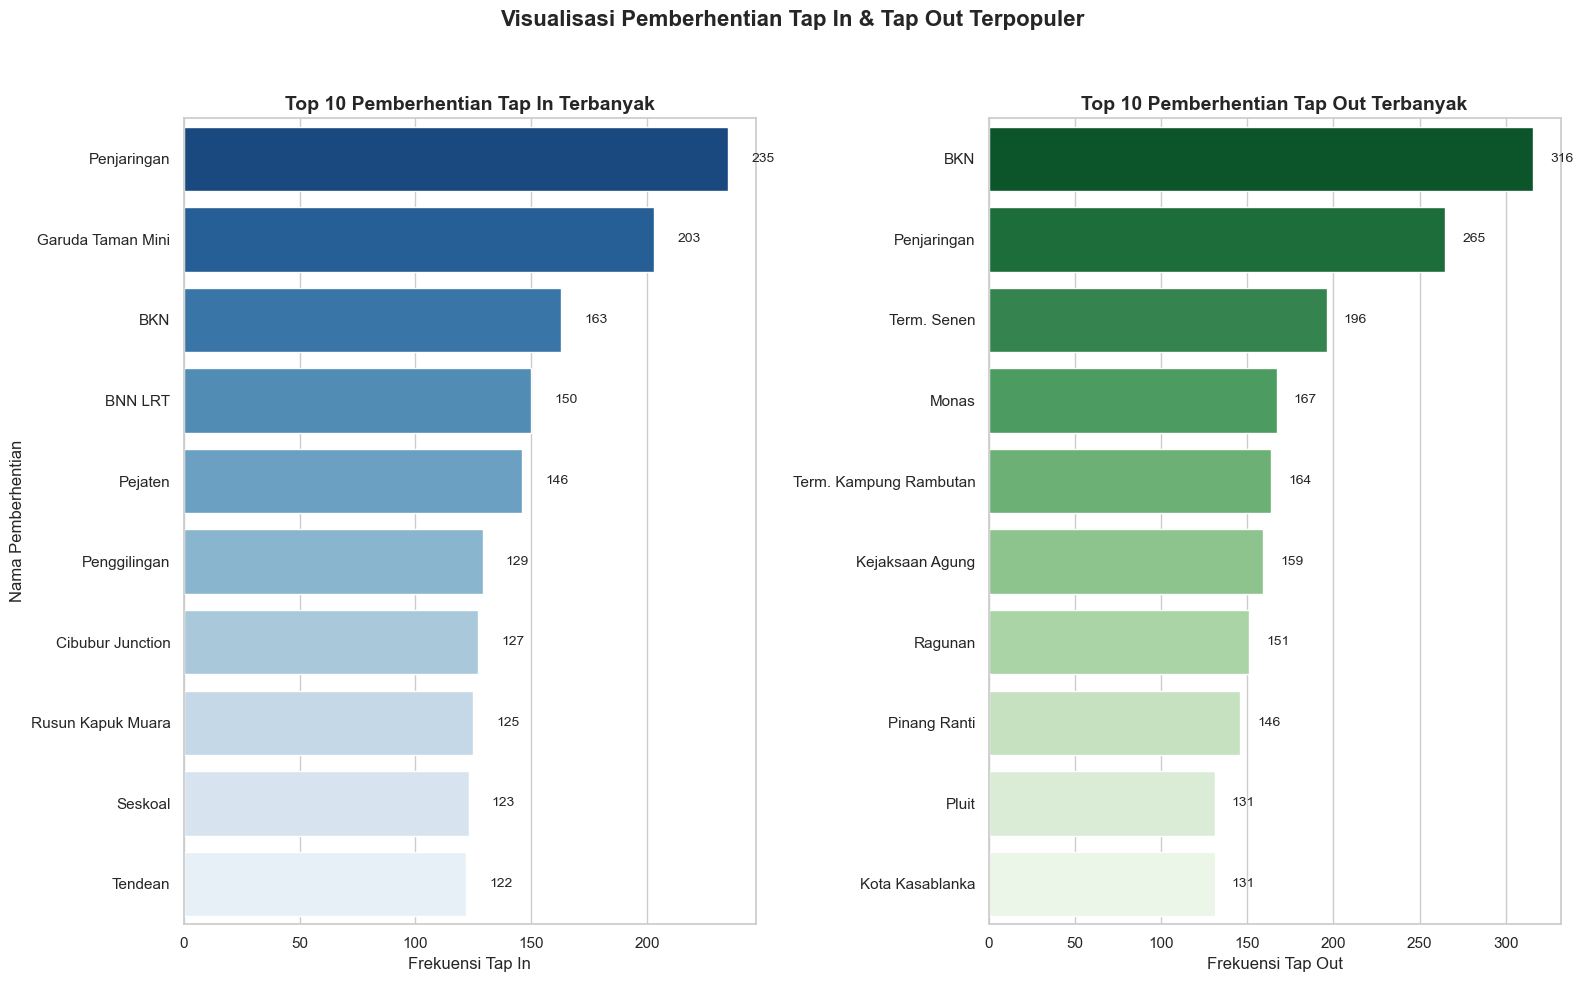

In [53]:
plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")

# Warna custom
palette_in = sns.color_palette("Blues_r", len(top_tabin))
palette_out = sns.color_palette("Greens_r", len(top_tabout))

# Visualisasi frekuensi top tap in
plt.subplot(1, 2, 1)
bar_in = sns.barplot(data=top_tabin, x='transID', y='tapInStopsName', palette=palette_in)
plt.title('Top 10 Pemberhentian Tap In Terbanyak', fontsize=14, fontweight='bold')
plt.xlabel('Frekuensi Tap In', fontsize=12)
plt.ylabel('Nama Pemberhentian', fontsize=12)

# Tambahkan anotasi di setiap batang Tap In
for p in bar_in.patches:
    width = p.get_width()
    plt.text(width + 10, p.get_y() + p.get_height()/2,
             int(width), va='center', fontsize=10)

# Visualisasi frekuensi top tap out
plt.subplot(1, 2, 2)
bar_out = sns.barplot(data=top_tabout, x='transID', y='tapOutStopsName', palette=palette_out)
plt.title('Top 10 Pemberhentian Tap Out Terbanyak', fontsize=14, fontweight='bold')
plt.xlabel('Frekuensi Tap Out', fontsize=12)
plt.ylabel('')

# Tambahkan anotasi di setiap batang Tap Out
for p in bar_out.patches:
    width = p.get_width()
    plt.text(width + 10, p.get_y() + p.get_height()/2,
             int(width), va='center', fontsize=10)

# Judul utama
plt.suptitle("Visualisasi Pemberhentian Tap In & Tap Out Terpopuler", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



Penjaringan adalah pemberhentian yang paling populer untuk tap in, sementara BKN paling populer untuk tap out.

Beberapa pemberhentian, seperti Penjaringan dan BKN, muncul di kedua grafik, menunjukkan bahwa keduanya adalah titik penting dalam perjalanan penumpang.

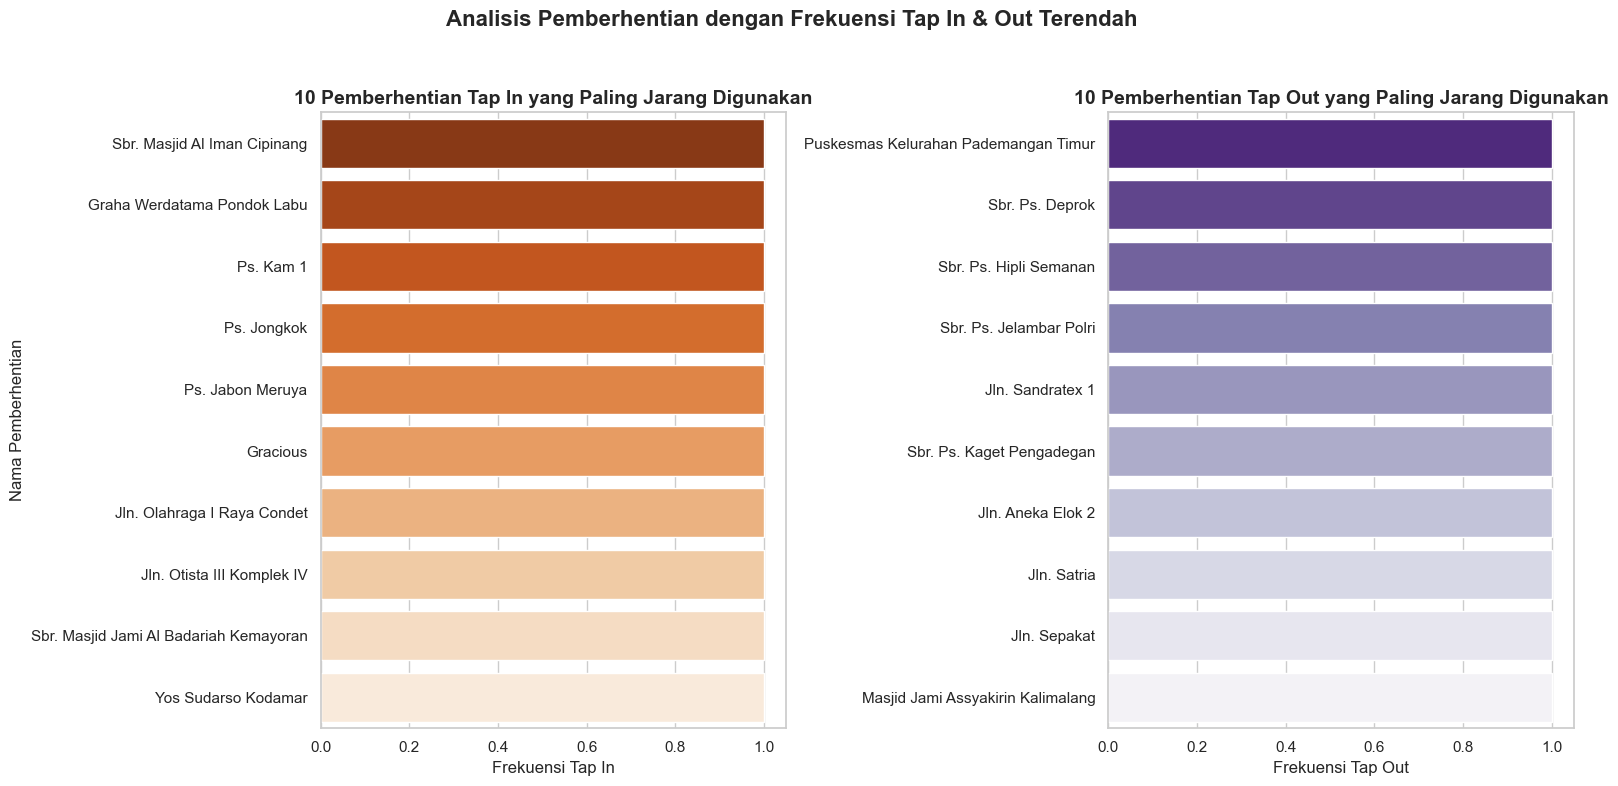

In [54]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")

# Warna palette custom
palette_in = sns.color_palette("Oranges_r", len(bottom_tabin))
palette_out = sns.color_palette("Purples_r", len(bottom_tabout))

# Visualisasi frekuensi bottom tap in
plt.subplot(1, 2, 1)
sns.barplot(data=bottom_tabin, x='transID', y='tapInStopsName', palette=palette_in)
plt.title('10 Pemberhentian Tap In yang Paling Jarang Digunakan', fontsize=14, fontweight='bold')
plt.xlabel('Frekuensi Tap In', fontsize=12)
plt.ylabel('Nama Pemberhentian', fontsize=12)

# Visualisasi frekuensi bottom tap out
plt.subplot(1, 2, 2)
sns.barplot(data=bottom_tabout, x='transID', y='tapOutStopsName', palette=palette_out)
plt.title('10 Pemberhentian Tap Out yang Paling Jarang Digunakan', fontsize=14, fontweight='bold')
plt.xlabel('Frekuensi Tap Out', fontsize=12)
plt.ylabel('')

# Judul utama
plt.suptitle("Analisis Pemberhentian dengan Frekuensi Tap In & Out Terendah", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Pemberhentian yang tercantum di sini cenderung kurang populer atau mungkin terletak di area yang tidak terlalu ramai, sehingga memiliki frekuensi penggunaan yang rendah baik untuk tap in maupun tap out.

Informasi ini berguna bagi operator transportasi untuk mengevaluasi dan memahami lokasi yang kurang dimanfaatkan dalam sistem transportasi, yang mungkin bisa ditingkatkan dalam hal pelayanan atau infrastruktur.

In [55]:
# Menghitung frekuensi rute yang paling sering dan jarang digunakan
most_corridor = df.groupby('corridorName')[['transID']].count().sort_values('transID',ascending=False).reset_index().rename(columns={'transID':"frekuensi"})
top_corridor = most_corridor.head(10)
bottom_corridor = most_corridor.tail(10)
display(top_corridor,bottom_corridor)

,corridorName,frekuensi
0,Cibubur - Balai Kota,394
1,Ciputat - CSW,384
2,Harmoni - Jakarta International Stadium,343
3,Pulo Gadung - Monas,340
4,Kalideres - Bundaran HI via Veteran,335
5,Kampung Rambutan - Pondok Gede,335
6,Rusun Pondok Bambu - Walikota Jakarta Timur,330
7,Kebayoran Lama - Tanah Abang,328
8,Pasar Minggu - Tanah Abang,314
9,Rusun Rawa Bebek - Kodamar,313


,corridorName,frekuensi
206,Rusun Pinus Elok - Rusun Pulo Gebang,56
207,St. LRT Pegangsaan Dua - JIS,54
208,Stasiun Manggarai - Blok M,54
209,Pondok Kelapa - BKN,49
210,Gondangdia - Balai Kota,41
211,Grogol - Pos Pengumben via Slipi,39
212,Senen - Tanah Abang,38
213,Term. Pulo Gadung - Lampiri,30
214,Tanah Abang - Kebayoran Lama via Pos Pengumben,22
215,Kampung Rambutan - Blok M,18


Cibubur - Balai Kota merupakan rute yang paling sering digunakan, diikuti oleh Ciputat - CSW dan Harmoni - Jakarta International Stadium.

Rusun Pinus Elok - Rusun Pulo Gebang merupakan rute yang paling jarang digunakan, diikuti oleh St. LRT Pegangsaan Dua - JIS dan Stasiun Manggarai - Blok M.

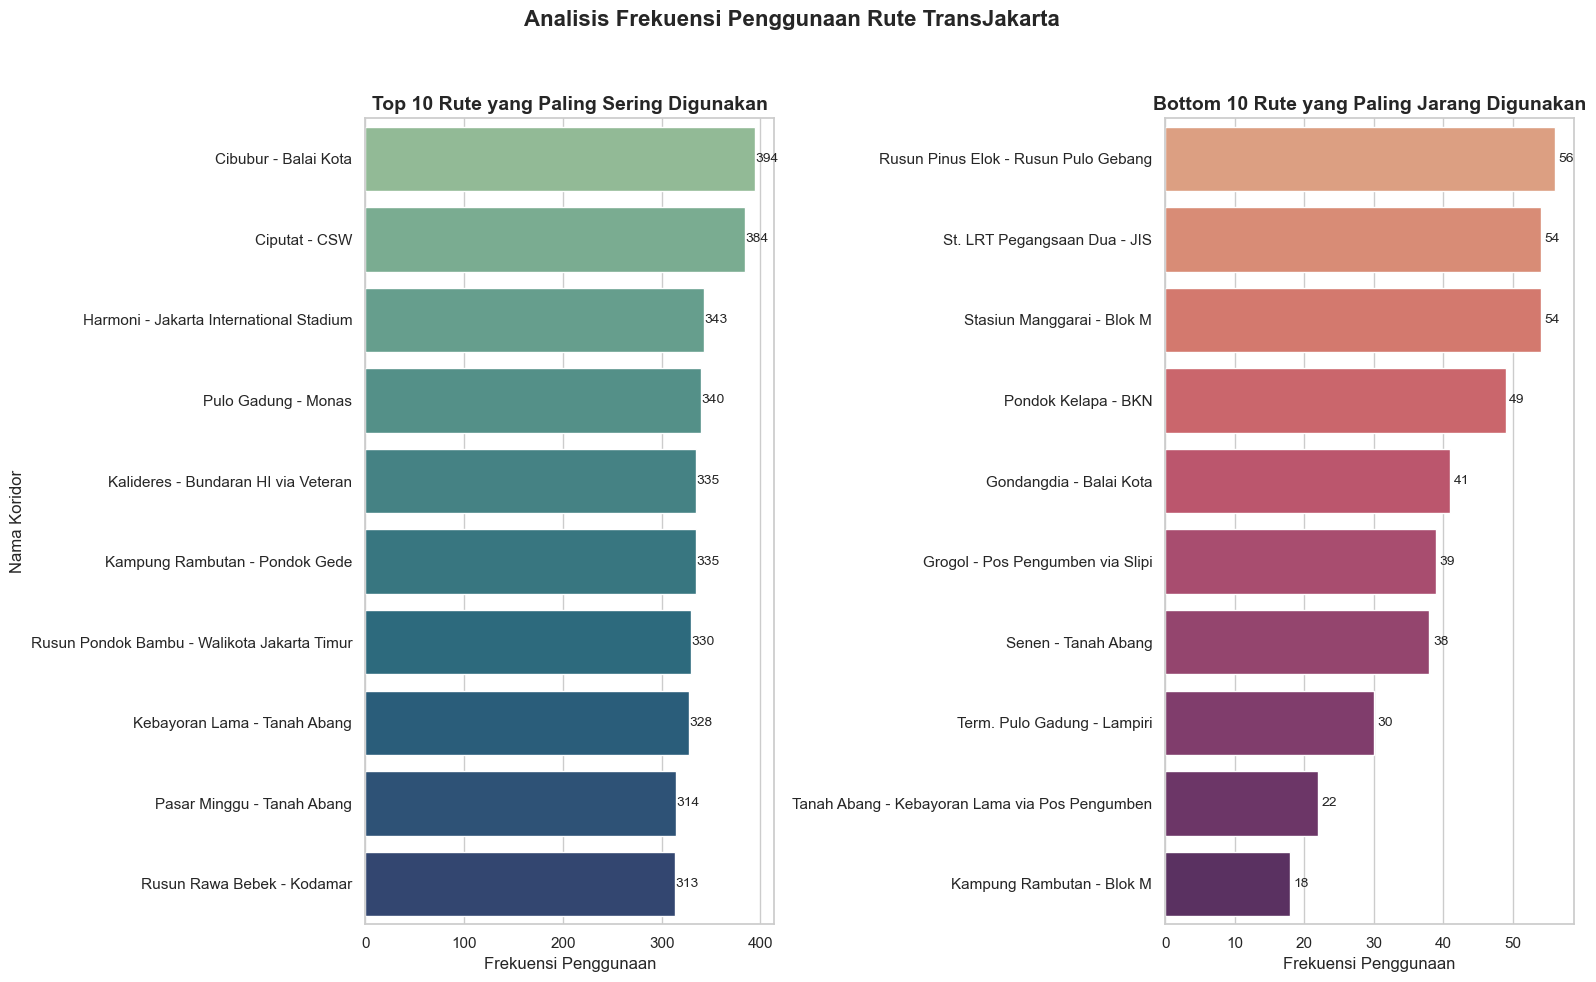

In [56]:
plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")

# Palet warna
palette_top = sns.color_palette("crest", len(top_corridor))
palette_bottom = sns.color_palette("flare", len(bottom_corridor))

# Visualisasi top 10 rute
plt.subplot(1, 2, 1)
bar_top = sns.barplot(data=top_corridor, y='corridorName', x='frekuensi', palette=palette_top)
plt.title('Top 10 Rute yang Paling Sering Digunakan', fontsize=14, fontweight='bold')
plt.xlabel('Frekuensi Penggunaan', fontsize=12)
plt.ylabel('Nama Koridor', fontsize=12)

# Anotasi frekuensi
for p in bar_top.patches:
    width = p.get_width()
    plt.text(width + 0.5, p.get_y() + p.get_height()/2,
             int(width), va='center', fontsize=10)

# Visualisasi bottom 10 rute
plt.subplot(1, 2, 2)
bar_bottom = sns.barplot(data=bottom_corridor, y='corridorName', x='frekuensi', palette=palette_bottom)
plt.title('Bottom 10 Rute yang Paling Jarang Digunakan', fontsize=14, fontweight='bold')
plt.xlabel('Frekuensi Penggunaan', fontsize=12)
plt.ylabel('')

# Anotasi frekuensi
for p in bar_bottom.patches:
    width = p.get_width()
    plt.text(width + 0.5, p.get_y() + p.get_height()/2,
             int(width), va='center', fontsize=10)

# Judul utama
plt.suptitle("Analisis Frekuensi Penggunaan Rute TransJakarta", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Top 10 rute menunjukkan jalur-jalur yang memiliki tingkat frekuensi penumpang yang tinggi, kemungkinan karena rute tersebut melayani area-area yang padat atau merupakan jalur penting dalam jaringan transportasi.

Bottom 10 rute menunjukkan jalur yang jarang digunakan, mungkin karena faktor lokasi atau konektivitas yang kurang diminati oleh penumpang.

### 2. Menggunakan data demografis seperti usia, jenis kelamin, dan frekuensi perjalanan untuk segmentasi pengguna serta menyesuaikan layanan dengan kebutuhan spesifik tiap kelompok.

Tujuan: Menyesuaikan layanan dengan kebutuhan spesifik tiap kelompok pengguna.

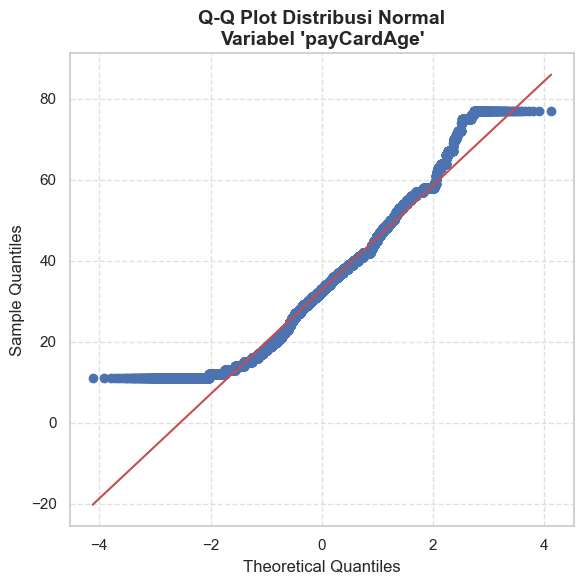

UJI NORMALITAS: SHAPIRO-WILK UNTUK VARIABEL 'payCardAge'
Statistic : 0.9766
P-value   : 0.0000
Kesimpulan: P-value <= 0.05 → Data TIDAK berdistribusi normal ❌


In [57]:
from scipy import stats

# Uji normalitas menggunakan Shapiro-Wilk
statistic, pvalue = stats.shapiro(df['payCardAge'])

# Q-Q Plot
plt.figure(figsize=(6, 6))
sns.set(style="whitegrid")
stats.probplot(df['payCardAge'], dist="norm", plot=plt)
plt.title("Q-Q Plot Distribusi Normal\nVariabel 'payCardAge'", fontsize=14, fontweight='bold')
plt.xlabel("Theoretical Quantiles", fontsize=12)
plt.ylabel("Sample Quantiles", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Output hasil uji Shapiro
print("="*60)
print("UJI NORMALITAS: SHAPIRO-WILK UNTUK VARIABEL 'payCardAge'")
print(f"Statistic : {statistic:.4f}")
print(f"P-value   : {pvalue:.4f}")

if pvalue >= 0.05:
    print("Kesimpulan: P-value > 0.05 → Data diasumsikan berdistribusi normal ✅")
else:
    print("Kesimpulan: P-value <= 0.05 → Data TIDAK berdistribusi normal ❌")
print("="*60)


In [58]:
# Mengelompokkan data berdasarkan usia
age_frek = df.groupby(['payCardAge']).size().reset_index(name='Frekuensi')
age_frek

,payCardAge,Frekuensi
0,11,775
1,12,702
2,13,722
3,14,732
4,15,846
...,...,...
61,72,48
62,74,8
63,75,81
64,76,16


In [59]:
top_age_frek = age_frek.sort_values("Frekuensi",ascending=False).head(10)
bottom_age_frek = age_frek.sort_values("Frekuensi",ascending=False).tail(10)
display(top_age_frek,bottom_age_frek)

,payCardAge,Frekuensi
31,42,1343
20,31,1341
18,29,1309
25,36,1250
27,38,1204
28,39,1157
23,34,1133
29,40,1124
16,27,1100
21,32,1082


,payCardAge,Frekuensi
55,66,41
59,70,39
50,61,22
60,71,18
64,76,16
49,60,9
62,74,8
57,68,5
54,65,4
58,69,3


Usia sekitar 30 hingga 40 tahun memiliki jumlah penumpang yang tertinggi, dengan kisaran 1343 - 1082 penumpang.

Usia diatas 60 tahun adalah usia dimana orang jarang menggunakan transformasi umum khususunya transjakarta.



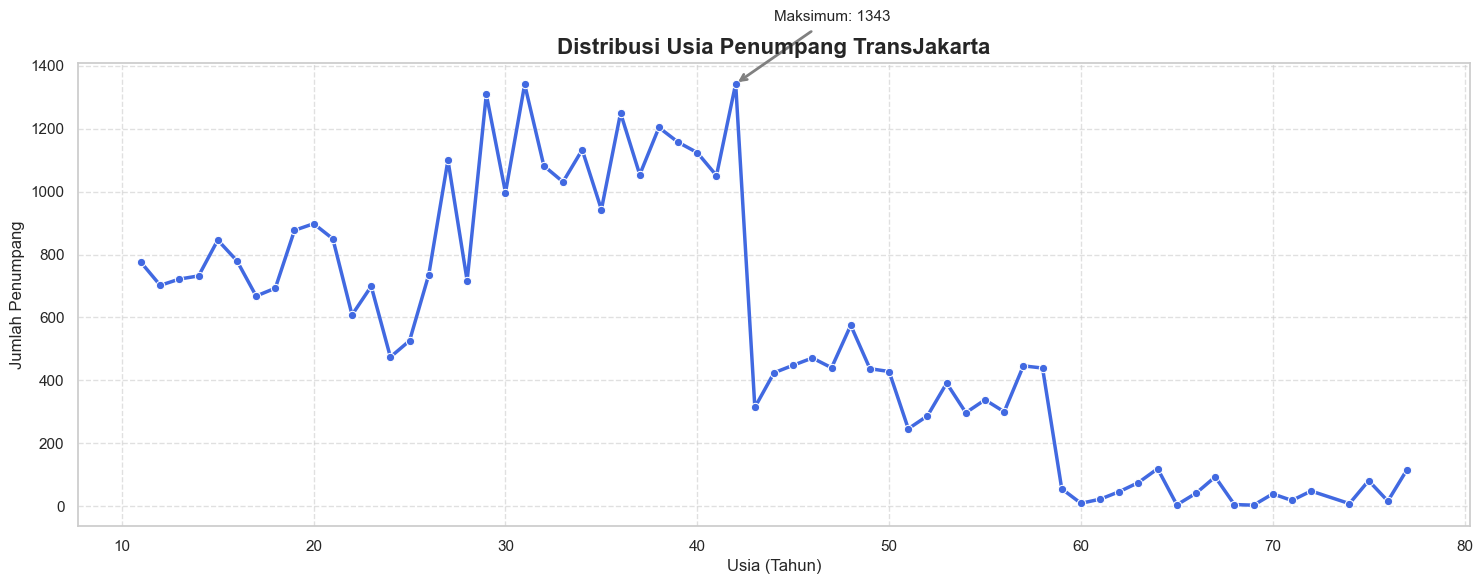

In [60]:
plt.figure(figsize=(15, 6))
sns.set(style="whitegrid")

# Lineplot dengan warna dan marker
ax = sns.lineplot(data=age_frek, x="payCardAge", y="Frekuensi", color='royalblue', marker='o', linewidth=2.5)

# Judul dan label
plt.title('Distribusi Usia Penumpang TransJakarta', fontsize=16, fontweight='bold')
plt.xlabel('Usia (Tahun)', fontsize=12)
plt.ylabel('Jumlah Penumpang', fontsize=12)

# Tambahkan anotasi pada nilai tertinggi
max_frek = age_frek["Frekuensi"].max()
max_age = age_frek[age_frek["Frekuensi"] == max_frek]["payCardAge"].values[0]

plt.annotate(f'Maksimum: {max_frek}', 
             xy=(max_age, max_frek), 
             xytext=(max_age + 2, max_frek + 200),
             arrowprops=dict(arrowstyle='->', color='gray', lw=2),
             fontsize=11, backgroundcolor='white')

# Tambahkan grid
plt.grid(True, linestyle='--', alpha=0.6)

# Tampilkan plot
plt.tight_layout()
plt.show()


Kelompok usia yang paling dominan dalam menggunakan layanan transportasi ini adalah usia 25-40 tahun.

Ada fluktuasi pada jumlah penumpang, dengan penurunan yang signifikan setelah usia 40 tahun.

Penumpang dengan usia lebih dari 50 tahun cenderung jauh lebih sedikit dibandingkan dengan kelompok usia yang lebih muda.

In [61]:
# Mengelompokkan data berdasarkan jenis kelamin
gender_frek = df.groupby(['payCardSex']).size().reset_index(name='Frekuensi').sort_values("Frekuensi",ascending=False)
gender_frek

,payCardSex,Frekuensi
0,Female,19439
1,Male,17062


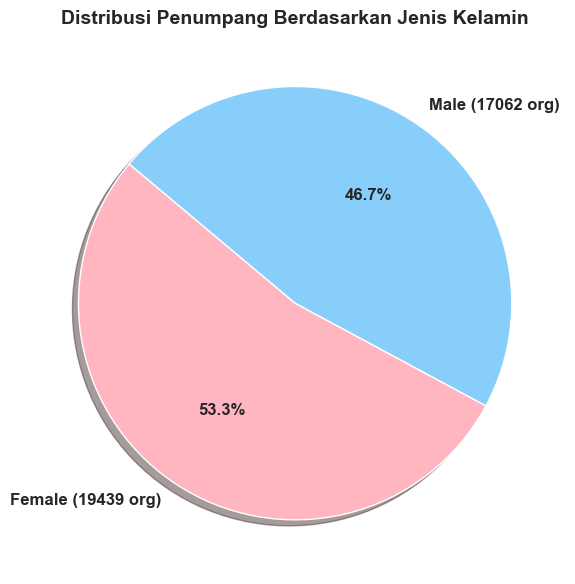

In [62]:
plt.figure(figsize=(8, 6))

# Warna dan label
colors = ['#FFB6C1', '#87CEFA']  # Pink dan Sky Blue soft
labels = [f"{label} ({value} org)" for label, value in zip(gender_frek['payCardSex'], gender_frek['Frekuensi'])]

# Pie chart
plt.pie(gender_frek['Frekuensi'], 
        labels=labels,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        shadow=True,
        textprops={'fontsize': 12, 'fontweight': 'bold'})

# Judul
plt.title('Distribusi Penumpang Berdasarkan Jenis Kelamin', fontsize=14, fontweight='bold')

# Tampilkan
plt.tight_layout()
plt.show()


Jumlah penumpang perempuan (53.3%) sedikit lebih banyak dibandingkan dengan penumpang laki-laki (46.7%).

### 3. Menganalisis data waktu tap in dan tap out untuk mengetahui durasi perjalanan penumpang, mengidentifikasi waktu sibuk, dan mengoptimalkan jadwal keberangkatan.

Tujuan untuk meningkatkan pengalaman pengguna transportasi, meningkatkan efisiensi operasional, dan memberikan pelayanan yang lebih tepat sesuai kebutuhan.

In [63]:
# Menganalisis waktu sibuk (frekuensi tap in per jam)
df['hour_tapInTime'] = df['tapInTime'].dt.hour
peak_hour = df.groupby('hour_tapInTime')[['transID']].count().reset_index()
peak_hour

,hour_tapInTime,transID
0,5,3237
1,6,5620
2,7,2697
3,8,2782
4,9,2714
5,10,288
6,11,330
7,12,328
8,13,338
9,14,169


In [64]:
# Menganalisis waktu sibuk (frekuensi tap in per jam)
df['hour_tapOutTime'] = df['tapOutTime'].dt.hour
peak_hour = df.groupby('hour_tapOutTime')[['transID']].count().reset_index()
peak_hour

,hour_tapOutTime,transID
0,0,1
1,5,1014
2,6,3447
3,7,3896
4,8,2751
5,9,2723
6,10,2441
7,11,1024
8,12,319
9,13,334


Puncak frekuensi tap in terjadi pada jam 6 pagi dan 5 sore, dengan lebih dari 5000 tap in. Ini mengindikasikan waktu jam sibuk di pagi hari dan sore hari, yang umumnya berhubungan dengan jam berangkat dan pulang kerja.

Setelah puncak pagi, frekuensi tap in turun secara signifikan, terutama setelah jam 9 pagi hingga 3 sore, yang menunjukkan periode non-sibuk di siang hari.

Puncak sore hari dimulai sekitar jam 4 sore dan mencapai puncaknya pada jam 5 sore.

Setelah jam sibuk sore, frekuensi menurun lagi mulai dari jam 6 sore hingga 8 malam, lalu tetap relatif rendah dan stabil hingga akhir malam.

In [65]:
top_peak_hour = df.groupby('hour_tapInTime')[['transID']].count().sort_values("transID",ascending=False).reset_index().head(5)
top_peak_hour

,hour_tapInTime,transID
0,6,5620
1,17,5281
2,16,3238
3,5,3237
4,8,2782


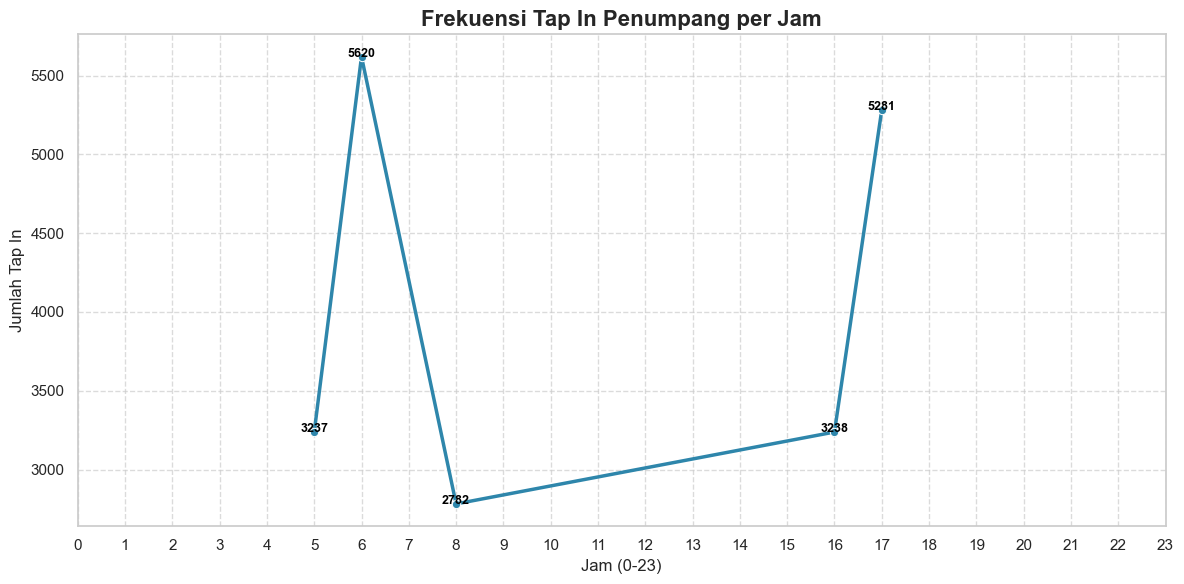

In [66]:
# Visualisasi frekuensi tap in per jam
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Line plot dengan warna dan marker yang lebih menarik
ax = sns.lineplot(
    data=top_peak_hour, 
    x="hour_tapInTime", 
    y="transID", 
    marker='o', 
    color="#2E86AB", 
    linewidth=2.5
)

# Tambahkan anotasi angka di tiap titik
for i, row in top_peak_hour.iterrows():
    plt.text(row['hour_tapInTime'], row['transID'] + 1, 
             f"{int(row['transID'])}", 
             color='black', 
             ha='center', 
             fontsize=9, 
             fontweight='bold')

# Set tampilan
plt.title('Frekuensi Tap In Penumpang per Jam', fontsize=16, fontweight='bold')
plt.xlabel('Jam (0-23)', fontsize=12)
plt.ylabel('Jumlah Tap In', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Data ini menunjukkan pola perjalanan yang tipikal di mana banyak orang melakukan perjalanan di waktu pagi (untuk berangkat bekerja atau sekolah) dan sore (untuk pulang).

In [67]:
# Konversi durasi perjalanan menjadi menit
df['tripDurationMinutes'] = round(df['tripDuration'].dt.total_seconds() / 60)

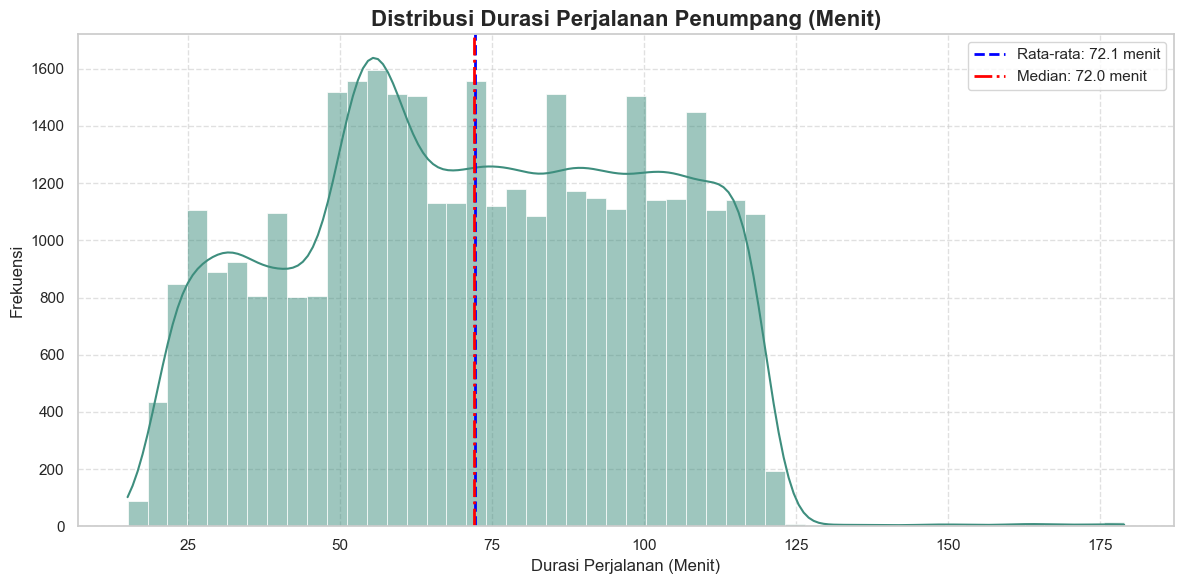

In [68]:
# Visualisasi distribusi durasi perjalanan
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Histogram
sns.histplot(
    df['tripDurationMinutes'], 
    bins=50, 
    kde=True, 
    color='#3E8E7E', 
    edgecolor='white', 
    linewidth=0.5
)

# Hitung statistik penting
mean_duration = df['tripDurationMinutes'].mean()
median_duration = df['tripDurationMinutes'].median()

# Tambahkan garis rata-rata
plt.axvline(mean_duration, color='blue', linestyle='--', linewidth=2, label=f'Rata-rata: {mean_duration:.1f} menit')
# Tambahkan garis median
plt.axvline(median_duration, color='red', linestyle='-.', linewidth=2, label=f'Median: {median_duration:.1f} menit')

# Styling judul dan label
plt.title('Distribusi Durasi Perjalanan Penumpang (Menit)', fontsize=16, fontweight='bold')
plt.xlabel('Durasi Perjalanan (Menit)', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()



Durasi perjalanan berkisar dari kurang dari 25 menit hingga sekitar 175 menit.

Puncak frekuensi perjalanan terjadi antara 50 hingga 60 menit, dengan frekuensi tertinggi lebih dari 1750 perjalanan. Ini menunjukkan bahwa mayoritas perjalanan memiliki durasi sekitar 50-60 menit.

Setelah puncak ini, frekuensi tetap relatif tinggi dan stabil hingga mendekati 125 menit, yang menunjukkan bahwa banyak perjalanan juga memiliki durasi antara 50 hingga 125 menit.

Setelah 125 menit, frekuensi perjalanan menurun drastis, yang berarti perjalanan dengan durasi lebih dari itu jarang terjadi.

Rata-rata perjalanan penumpang adalah 72 menit.

In [69]:
# rata-rata waktu pernjalanan yang ditempuh penumpang (menit)
df["tripDurationMinutes"].median()

72.0

dilihat dari keseluruhan bahwa rata-rata perjalanan adalah 72 menit

### 4. Mengidentifikasi stasiun atau pemberhentian yang sering digunakan dan memerlukan peningkatan fasilitas atau manajemen kapasitas.

Tujuan: Mengidentifikasi pemberhentian yang membutuhkan peningkatan fasilitas atau manajemen kapasitas.

In [70]:
display(top_tabin,bottom_tabin)

,tapInStopsName,transID
0,Penjaringan,235
1,Garuda Taman Mini,203
2,BKN,163
3,BNN LRT,150
4,Pejaten,146
5,Penggilingan,129
6,Cibubur Junction,127
7,Rusun Kapuk Muara,125
8,Seskoal,123
9,Tendean,122


,tapInStopsName,transID
2512,Sbr. Masjid Al Iman Cipinang,1
2513,Graha Werdatama Pondok Labu,1
2514,Ps. Kam 1,1
2515,Ps. Jongkok,1
2516,Ps. Jabon Meruya,1
2517,Gracious,1
2518,Jln. Olahraga I Raya Condet,1
2519,Jln. Otista III Komplek IV,1
2520,Sbr. Masjid Jami Al Badariah Kemayoran,1
2521,Yos Sudarso Kodamar,1


In [71]:
df["tapInStopsName"]

0                     Pal Putih
1                    Kemenkes 2
2                  Gg. Kunir II
3                  Taman Elok 1
4        Sunter Boulevard Barat
                  ...          
37895                    Tosari
37896         Garuda Taman Mini
37897             Plaza Sentral
37898            Museum Textile
37899                Adam Malik
Name: tapInStopsName, Length: 36501, dtype: object

In [72]:
display(top_tabout,bottom_tabout)

,transID
tapOutStopsName,
BKN,316
Penjaringan,265
Term. Senen,196
Monas,167
Term. Kampung Rambutan,164
Kejaksaan Agung,159
Ragunan,151
Pinang Ranti,146
Pluit,131


,transID
tapOutStopsName,
Puskesmas Kelurahan Pademangan Timur,1
Sbr. Ps. Deprok,1
Sbr. Ps. Hipli Semanan,1
Sbr. Ps. Jelambar Polri,1
Jln. Sandratex 1,1
Sbr. Ps. Kaget Pengadegan,1
Jln. Aneka Elok 2,1
Jln. Satria,1
Jln. Sepakat,1


Untuk mengatasi kebutuhan peningkatan fasilitas dan manajemen kapasitas, pemberhentian dengan frekuensi Tap In dan Tap Out yang tinggi seperti Penjaringan, BKN, dan Garuda Taman Mini harus diprioritaskan. Fasilitas seperti tempat duduk, area tunggu yang lebih besar, serta manajemen alur penumpang yang lebih baik dapat membantu mengakomodasi jumlah penumpang yang tinggi di lokasi-lokasi ini.

Pemberhentian yang termasuk dalam daftar Bottom 10 ini tidak menunjukkan kebutuhan mendesak untuk peningkatan kapasitas atau fasilitas kecuali jika ada masalah aksesibilitas atau kenyamanan yang menyebabkan rendahnya penggunaan.

### 5. Menganalisis data pembayaran untuk memahami kontribusi pendapatan dari berbagai rute dan mengukur dampak perubahan tarif terhadap jumlah penumpang.

Tujuan: Memahami kontribusi pendapatan dari berbagai rute dan dampak perubahan tarif terhadap jumlah penumpang.

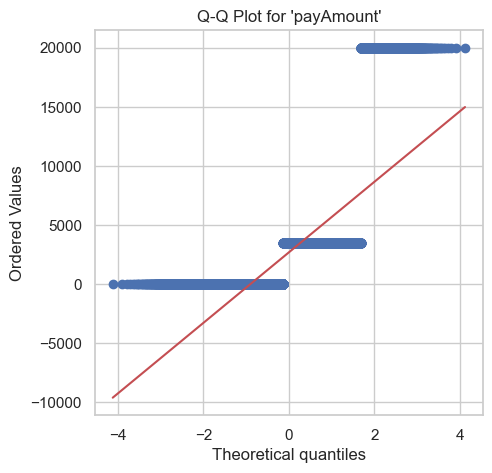

P-value: 2.176380675981441e-132. p-value <= 0.05. Kita TIDAK mengasumsikan variable payAmount terdistribusi normal


In [73]:
# Uji normalitas menggunakan Shapiro-Wilk
statistic, pvalue = stats.shapiro(df['payAmount'])

# Plot Q-Q Plot untuk melihat distribusi
plt.figure(figsize=(5, 5))
stats.probplot(df['payAmount'], dist="norm", plot=plt)
plt.title("Q-Q Plot for 'payAmount'")
plt.show()


if pvalue >= 0.05:
    print(f'P-value: {pvalue}. p-value > 0.05. Kita mengasumsikan variable payAmount terdistribusi normal')
else:
    print(f'P-value: {pvalue}. p-value <= 0.05. Kita TIDAK mengasumsikan variable payAmount terdistribusi normal')

In [74]:
# Menghitung total pendapatan per rute
revenue_percorridor = df.groupby('corridorName')[['payAmount']].sum().sort_values('payAmount',ascending=False).reset_index()
revenue_percorridor

,corridorName,payAmount
0,Cibubur - Balai Kota,7880000.0
1,Bekasi Barat - Kuningan,4543500.0
2,Cinere - Bundaran Senayan,3580000.0
3,Palem Semi - Bundaran Senayan,3560000.0
4,Cibubur Junction - Blok M,3160000.0
...,...,...
211,Rusun Kapuk Muara - Penjaringan,0.0
212,Rusun Jatinegara Kaum - Pulo Gadung,0.0
213,Rusun Jati Rawasari - Senen,0.0
214,Rusun Flamboyan - Cengkareng,0.0


Identifikasi Pemberhentian yang Membutuhkan Peningkatan Fasilitas: Rute-rute dengan pembayaran tertinggi atau pengguna yang padat, seperti Cibubur - Balai Kota, harus mendapatkan perhatian lebih untuk pengelolaan kapasitas. Selain itu, koridor gratis juga perlu ditingkatkan fasilitasnya agar tetap dapat melayani masyarakat dengan baik.

Strategi Lanjutan: Untuk koridor yang jarang digunakan atau gratis, perlu diidentifikasi apakah kapasitas atau fasilitas yang tersedia sudah memadai atau perlu dioptimalkan sesuai dengan kebutuhan masyarakat yang dilayani.

Analisis ini menunjukkan pentingnya membedakan antara rute yang ramai dengan rute yang membutuhkan dukungan khusus, sehingga penyedia transportasi dapat fokus pada peningkatan yang lebih efisien dan tepat sasaran.

In [75]:
top10_revenue_percorridor = revenue_percorridor.head(10)
top10_revenue_percorridor

,corridorName,payAmount
0,Cibubur - Balai Kota,7880000.0
1,Bekasi Barat - Kuningan,4543500.0
2,Cinere - Bundaran Senayan,3580000.0
3,Palem Semi - Bundaran Senayan,3560000.0
4,Cibubur Junction - Blok M,3160000.0
5,Bintaro - Fatmawati,2943500.0
6,Bekasi Barat - Blok M,2540000.0
7,Cibubur - Kuningan,1900000.0
8,BSD Serpong - Fatmawati,1843500.0
9,Cinere - Kuningan,1740000.0


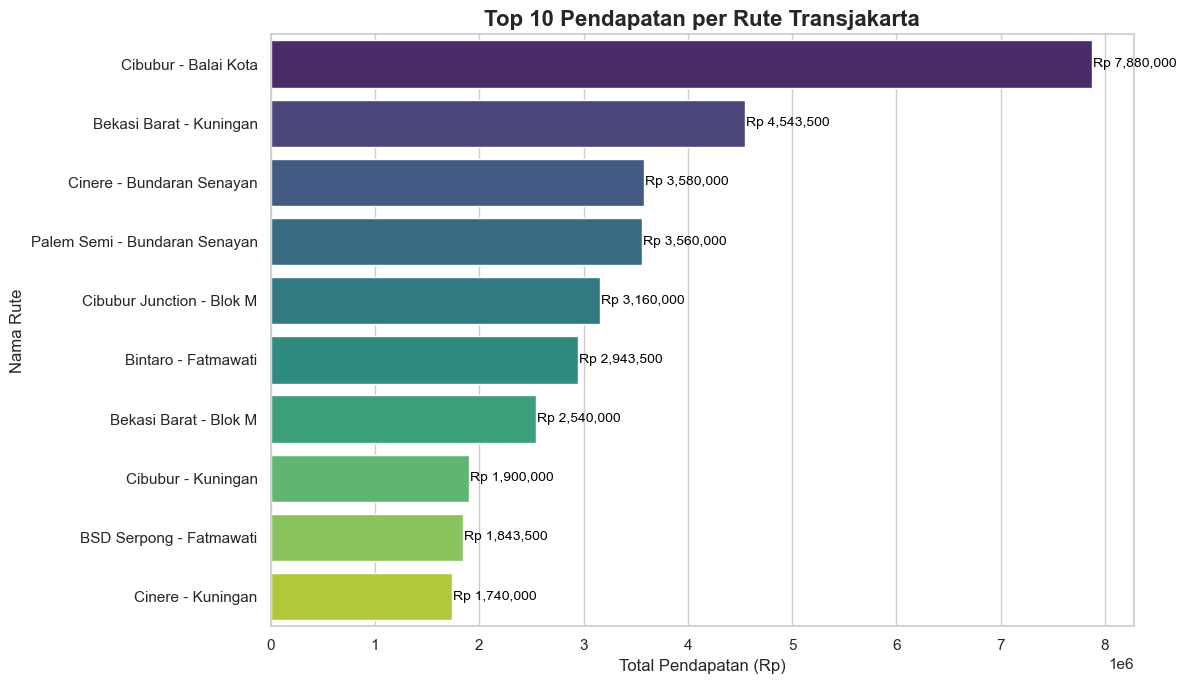

In [76]:
# Visualisasi pendapatan per rute (Top 10)
plt.figure(figsize=(12, 7))
sns.set(style="whitegrid")

# Palet warna untuk membedakan rute
palette = sns.color_palette("viridis", len(top10_revenue_percorridor))

# Plot bar
ax = sns.barplot(
    data=top10_revenue_percorridor,
    y='corridorName',
    x='payAmount',
    palette=palette
)

# Tambahkan anotasi nilai pendapatan
for index, row in top10_revenue_percorridor.iterrows():
    ax.text(row['payAmount'] + 10000, index, f"Rp {int(row['payAmount']):,}", 
            color='black', va='center', fontsize=10)

# Judul dan label sumbu
plt.title('Top 10 Pendapatan per Rute Transjakarta', fontsize=16, fontweight='bold')
plt.xlabel('Total Pendapatan (Rp)', fontsize=12)
plt.ylabel('Nama Rute', fontsize=12)

plt.tight_layout()
plt.show()


Cibubur - Balai Kota menjadi fokus utama dalam hal pengelolaan kapasitas dan peningkatan layanan karena tingginya pendapatan menunjukkan tingginya permintaan.

Rute-rute dengan pendapatan lebih rendah, seperti BSD Serpong - Fatmawati dan Cinere - Kuningan, mungkin memerlukan evaluasi tambahan untuk melihat apakah ada potensi peningkatan pelayanan atau penyesuaian kapasitas berdasarkan kebutuhan pengguna di area tersebut.

Implikasi Manajemen:
Operator dapat mempertimbangkan untuk meningkatkan layanan di rute dengan pendapatan tinggi (misalnya, lebih banyak armada atau frekuensi perjalanan yang lebih tinggi) dan mengelola sumber daya dengan baik di rute yang menghasilkan pendapatan lebih rendah untuk efisiensi biaya dan operasional.

In [77]:
# Menganalisis jumlah penumpang berdasarkan jumlah pembayaran
payment_frek = df.groupby('payAmount')[['transID']].count().sort_values('transID',ascending=False).reset_index().rename(columns={"transID":"Total Transaksi"})
payment_frek = payment_frek.replace({3500.0:"3.500",0:"Gratis",20000.0:"20.000"})
payment_frek

,payAmount,Total Transaksi
0,3.500,18408
1,Gratis,16406
2,20.000,1687


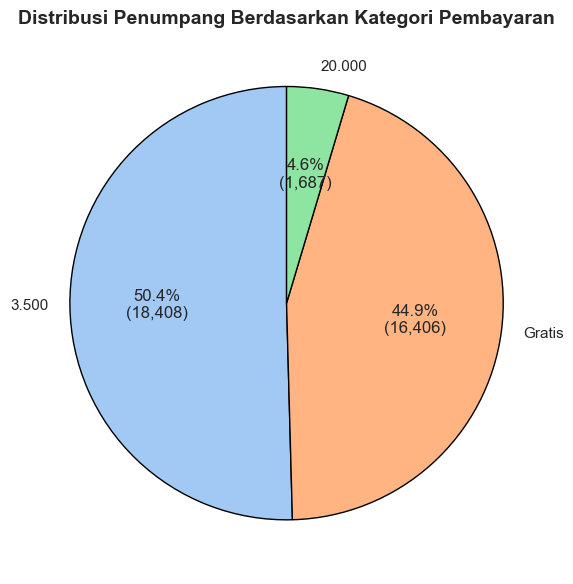

In [78]:
# Membuat diagram pie untuk distribusi Kategori pembayaran
plt.figure(figsize=(8, 6))
sns.set_palette("pastel")

# Warna lembut untuk pie chart
colors = sns.color_palette("pastel")[0:len(payment_frek)]

# Label gabungan kategori + persen
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{pct:.1f}%\n({val:,})'
    return my_autopct

plt.pie(
    payment_frek['Total Transaksi'],
    labels=payment_frek['payAmount'],
    autopct=make_autopct(payment_frek['Total Transaksi']),
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'black'}
)

plt.title('Distribusi Penumpang Berdasarkan Kategori Pembayaran', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


Tarif Rp 3.500 adalah yang paling umum digunakan, menunjukkan bahwa ini kemungkinan besar adalah tarif reguler untuk mayoritas perjalanan.

Persentase penumpang yang cukup tinggi mendapatkan layanan gratis (44.9%), yang bisa menjadi perhatian terkait keberlanjutan pendapatan jangka panjang jika terlalu banyak penumpang menggunakan layanan tanpa membayar.

Sebagian kecil pengguna (4.6%) membayar tarif yang lebih tinggi, yang mungkin mencerminkan penawaran layanan premium atau jarak perjalanan yang lebih panjang.

Implikasi Manajemen:
Operator dapat mempertimbangkan kembali proporsi penumpang gratis untuk memastikan keseimbangan antara pelayanan publik dan pendapatan yang cukup.

Peninjauan terhadap segmen penumpang yang membayar Rp 20.000 dapat dilakukan untuk mengevaluasi potensi pengembangan layanan atau peningkatan di segmen ini.

In [79]:
df.groupby('direction')[['payAmount']].sum().sort_values('payAmount',ascending=False).reset_index().rename(columns={"transID":"Total Transaksi"})

,direction,payAmount
0,Back,49206500.0
1,Go,48961500.0


Pendapatan untuk arah "Back" (Rp 49.206.500) sedikit lebih tinggi daripada arah "Go" (Rp 48.961.500), meskipun perbedaannya tidak signifikan.

Kesimpulan: Arah perjalanan tidak memiliki perbedaan pendapatan yang terlalu besar, yang berarti lalu lintas penumpang relatif seimbang antara arah berangkat dan kembali.

Implikasi Manajemen:
Keseimbangan ini menunjukkan bahwa kedua arah perjalanan sama-sama penting dan perlu dipastikan bahwa fasilitas serta armada pada kedua arah tetap memadai dan seimbang dalam pelayanannya.

In [80]:
df.groupby('direction')[['transID']].count().sort_values('transID',ascending=False).reset_index().rename(columns={"transID":"Total Transaksi"})

,direction,Total Transaksi
0,Back,18265
1,Go,18236


Jumlah transaksi "Back" (18.265) sedikit lebih banyak daripada "Go" (18.236), tetapi perbedaannya sangat kecil.

Kesimpulan: Jumlah transaksi untuk arah berangkat (Go) dan arah kembali (Back) hampir sama, yang menunjukkan pola pergerakan penumpang yang konsisten dalam kedua arah.

Implikasi Manajemen:
Karena perbedaan antara transaksi untuk kedua arah sangat kecil, tidak diperlukan perubahan signifikan dalam distribusi sumber daya antara kedua arah perjalanan.

Tetap menjaga keseimbangan dalam pelayanan di kedua arah akan membantu memastikan penumpang mendapatkan pengalaman yang konsisten di sepanjang rute.

### 6. Menggunakan temuan analisis untuk merancang kebijakan yang meningkatkan kepuasan pengguna, seperti program loyalitas, insentif bagi penumpang setia, atau penyesuaian rute.

Tujuan: Mengidentifikasi penumpang setia dan merancang kebijakan yang meningkatkan kepuasan pengguna.

In [81]:
# Mengidentifikasi penumpang setia berdasarkan frekuensi penggunaan
loyal_pass = df.groupby(['payCardID'])[['transID']].count().sort_values('transID',ascending=False).reset_index()
loyal_pass = loyal_pass.head(170)
loyal_pass

,payCardID,transID
0,3523401971692951,40
1,6541451803309614,40
2,3537344445143314,40
3,213136570183140,40
4,4469345175264680494,40
...,...,...
165,6594038151360079,40
166,213100436673249,40
167,4366512846464588,40
168,4440511208147260,40




Implikasi Manajemen:
Meningkatkan retensi pelanggan dengan memberikan penawaran yang menarik bagi penumpang setia.
- Program loyalitas: Penumpang setia seperti ini dapat ditawari program loyalitas, seperti diskon khusus atau poin reward yang dapat ditukar dengan tiket gratis atau keuntungan lain.
- Penawaran eksklusif: Mengidentifikasi pengguna dengan frekuensi tinggi memungkinkan perusahaan untuk memberikan penawaran eksklusif, seperti keanggotaan VIP dengan fasilitas tambahan (misalnya, akses prioritas atau ruang tunggu khusus).
- Umpan balik pengguna: Mengumpulkan umpan balik dari penumpang setia dapat membantu mengidentifikasi area yang perlu ditingkatkan dalam hal layanan, infrastruktur, atau pengalaman pengguna.

Memastikan bahwa penumpang yang melakukan perjalanan secara reguler mendapatkan pengalaman berkualitas yang konsisten agar tetap menggunakan layanan.

Kesimpulan:
Identifikasi penumpang setia ini bisa menjadi dasar untuk merancang kebijakan yang meningkatkan loyalitas dan kepuasan pengguna, seperti program loyalitas, penawaran khusus, atau peningkatan layanan yang sesuai dengan kebutuhan pengguna setia.

In [82]:
df.groupby('payCardBank')[['transID']].count().sort_values('transID',ascending=False).reset_index().rename(columns={"transID":"Total Transaksi"})

,payCardBank,Total Transaksi
0,dki,18033
1,emoney,6629
2,brizzi,3388
3,flazz,3103
4,online,2769
5,bni,2579


- Bank DKI memiliki pengguna yang sangat setia, sehingga penyedia transportasi perlu memperkuat kerja sama dengan bank ini untuk memastikan program loyalitas dan insentif dirancang dengan baik.

- Bank lain (e-money, BRIZZI, Flazz) juga bisa diajak kerja sama untuk menciptakan program yang lebih menarik bagi pengguna mereka, sehingga bisa menarik lebih banyak penumpang yang menggunakan layanan transportasi.

Kesimpulan:
Pengguna kartu dari Bank DKI adalah yang paling loyal, diikuti oleh pengguna kartu e-money, BRIZZI, dan Flazz. Kebijakan peningkatan kepuasan pengguna dapat mencakup program loyalitas berbasis bank, seperti diskon perjalanan, promosi spesial, dan peningkatan kemudahan pembayaran, terutama bagi pengguna setia dari bank-bank ini. Ini akan membantu meningkatkan kepuasan pengguna dan mendorong loyalitas lebih lanjut.

## Analisis Khusus
Analisis untuk meningkatkan `efisiensi, memperbaiki kualitas layanan, dan mendukung visi serta misinya dalam menyediakan transportasi yang memudahkan dan membahagiakan warga Jakarta`.

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36501 entries, 0 to 37899
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   transID              36501 non-null  object         
 1   payCardID            36501 non-null  object         
 2   payCardBank          36501 non-null  object         
 3   payCardName          36501 non-null  object         
 4   payCardtitle         36501 non-null  object         
 5   payCardSex           36501 non-null  object         
 6   payCardBirthDate     36501 non-null  datetime64[ns] 
 7   payCardAge           36501 non-null  int32          
 8   corridorID           36501 non-null  object         
 9   corridorName         36501 non-null  object         
 10  direction            36501 non-null  object         
 11  tapInStops           36501 non-null  object         
 12  tapInStopsName       36501 non-null  object         
 13  tapInStopsLat        

In [84]:
import datetime
df[df['tapInTime'].dt.date == datetime.date(2023, 4, 24)]

,transID,payCardID,payCardBank,payCardName,payCardtitle,payCardSex,payCardBirthDate,payCardAge,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tripDuration,hour_tapInTime,hour_tapOutTime,tripDurationMinutes
9000,ZGCD703D8K73CM,180062659848800,emoney,Bajragin Usada,Doesn't have a title,Male,2008-01-01,15,5,Matraman Baru - Ancol,Back,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-24 05:32:54,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-24 06:19:25,3500.0,0 days 00:46:31,5,6,47.0
9001,TBJK105W1G67PI,4885331907664776,dki,Gandi Widodo,Doesn't have a title,Female,1997-01-01,26,6C,Stasiun Tebet - Karet via Patra Kuningan,Go,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-24 06:37:12,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-24 07:14:34,3500.0,0 days 00:37:22,6,7,37.0
9002,SFOZ033H4X70ND,4996225095064169,dki,Emong Wastuti,Doesn't have a title,Female,1992-01-01,31,R1A,Pantai Maju - Kota,Go,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-24 05:50:59,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-24 06:20:13,3500.0,0 days 00:29:14,5,6,29.0
9003,FCNJ774S7X05HW,639099174703,flazz,Surya Wacana,Doesn't have a title,Female,1978-01-01,45,11D,Pulo Gebang - Pulo Gadung 2 via PIK,Go,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-24 05:30:00,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-24 06:09:54,3500.0,0 days 00:39:54,5,6,40.0
9004,YUCS677D3A16XQ,570928206772,flazz,Embuh Mardhiyah,Doesn't have a title,Male,1982-01-01,41,12,Tanjung Priok - Pluit,Go,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-24 05:38:43,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-24 06:06:36,3500.0,0 days 00:27:53,5,6,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37714,DVFR347B6T73JF,213152538083504,emoney,Nabila Megantara,Doesn't have a title,Female,1967-01-01,56,6D,Stasiun Tebet - Karet via Underpass,Back,B03307P,Sampoerna Strategic,-6.217152,106.81892,13,2023-04-24 08:20:04,B02873P,Plaza Sentral,-6.216247,106.81676,14.0,2023-04-24 10:02:11,3500.0,0 days 01:42:07,8,10,102.0
37785,FBFP105N5A57MO,5511077339427535,dki,R.A. Rahayu Saptono,Doesn't have a title,Female,1995-01-01,28,S11,BSD - Jelambar,Go,B05876P,Warung Mangga 1,-6.225899,106.63778,21,2023-04-24 10:14:19,B01864P,Kb. Nanas,-6.221291,106.63364,22.0,2023-04-24 10:35:39,3500.0,0 days 00:21:20,10,10,21.0
37826,TBPE047M9C27NI,3595205443049515,dki,Rina Gunarto,Doesn't have a title,Male,2007-01-01,16,JAK.33,Pulo Gadung - Kota,Back,B02739P,Perempatan Jln. Cempaka Putih Tengah XIII,-6.176256,106.87065,58,2023-04-24 18:53:28,B02998P,Pulo Gadung 3,-6.181757,106.90867,77.0,2023-04-24 21:29:53,0.0,0 days 02:36:25,18,21,156.0
37837,EQDE403M5K60CQ,3595625700824872,dki,Rahmi Haryanto,Doesn't have a title,Female,2009-01-01,14,BW9,Monas - Pantai Indah Kapuk,Back,B06040P,Pantai Maju,-6.093637,106.75068,0,2023-04-24 17:40:02,B06044P,The Piano,-6.094772,106.74292,3.0,2023-04-24 20:30:21,0.0,0 days 02:50:19,17,20,170.0


In [85]:
import re

def klasifikasi_koridor(nama_koridor):
    nama = str(nama_koridor).strip().upper()

    # Daftar kode berdasarkan jenis layanan
    kode_royaltrans = {
        "1K", "1T", "6P", "B13", "B14", "D31", "D32",
        "S12", "S13", "S14", "S31", "T21"
    }

    kode_koridor_utama = {
        "1", "2", "3", "4", "5", "6", "7", "8", "9", "10",
        "11", "12", "13", "14"
    }

    kode_koridor_lintas = {
        "2A", "3F", "3H", "4D", "5C", "5H", "6A", "6B", "6V",
        "7F", "9A", "9C", "9N", "10D", "10H", "13B", "13E", "L13E"
    }

    # Deteksi kode koridor dari string
    match = re.search(r'\b(JAK\.?\d+[A-Z]*|[A-Z]?\d+[A-Z]*)\b', nama.upper())

    if match:
        kode = match.group(1).upper()

        if kode.startswith("JAK"):
            return "Mikrotrans"
        elif kode in kode_royaltrans:
            return "Royaltrans"
        elif kode in kode_koridor_utama:
            return "Koridor Utama"
        elif kode in kode_koridor_lintas:
            return "Koridor Lintas"
        else:
            return "Non-BRT"
    else:
        return "Non-BRT"


In [86]:
df["Jenis Koridor"] = df["corridorID"].apply(klasifikasi_koridor)


In [87]:
df["Jenis Koridor"].value_counts()

Jenis Koridor
Non-BRT           16066
Mikrotrans        13357
Koridor Lintas     2735
Koridor Utama      2658
Royaltrans         1685
Name: count, dtype: int64

In [88]:
df[df["Jenis Koridor"] == 'Mikrotrans']

,transID,payCardID,payCardBank,payCardName,payCardtitle,payCardSex,payCardBirthDate,payCardAge,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tripDuration,hour_tapInTime,hour_tapOutTime,tripDurationMinutes,Jenis Koridor
7,XTKE052E5E87LN,3587341902618993,dki,Darmanto Rajasa,Doesn't have a title,Female,1991-01-01,32,JAK.03,Lebak Bulus - Andara,Back,B03416P,SDN Pondok Labu 11,-6.313269,106.802210,2,2023-04-03 06:44:24,B00899P,Jln. Baros,-6.311046,106.78400,12.0,2023-04-03 07:11:43,0.0,0 days 00:27:19,6,7,27.0,Mikrotrans
14,LZFD368Q3E81HJ,4056836188316,online,Nadine Utami,Doesn't have a title,Male,1975-01-01,48,JAK.46,Pasar Minggu - Jagakarsa,Back,B00608P,Gelanggang Remaja Pasar Minggu,-6.284615,106.837870,5,2023-04-03 05:38:44,B01062P,Jln. Gabus Raya,-6.301222,106.83623,17.0,2023-04-03 06:09:17,0.0,0 days 00:30:33,5,6,31.0,Mikrotrans
19,ZYRL615G4C05RD,5430018591726410,dki,Karna Waskita,Doesn't have a title,Male,1981-01-01,42,JAK.88,Terminal Tanjung Priok - Ancol Barat,Go,B00722P,Gunung Sahari Mangga Dua Timur,-6.137032,106.832540,20,2023-04-03 06:43:49,B05989P,Jln. Ancol Barat 6,-6.124810,106.81983,36.0,2023-04-03 07:30:45,0.0,0 days 00:46:56,6,7,47.0,Mikrotrans
21,ZJVI960B9I42DA,343851798729291,emoney,Garang Utama,Doesn't have a title,Female,1997-01-01,26,JAK.16,Cililitan - Condet,Go,B02144P,Lippo Mall Kramat Jati,-6.270835,106.867410,4,2023-04-03 05:08:36,B01393P,Jln. Mesjid Al Mabruk,-6.284350,106.85293,20.0,2023-04-03 05:30:45,0.0,0 days 00:22:09,5,5,22.0,Mikrotrans
24,SYLN486U0E02TA,2295833910329055,dki,Taufik Farida,Doesn't have a title,Female,1981-01-01,42,JAK.02,Kampung Melayu - Duren Sawit,Go,B05023P,Simpang Pahlawan Revolusi 1,-6.238658,106.899461,28,2023-04-03 05:43:14,B03135P,RS Duren Sawit 2,-6.232262,106.91019,39.0,2023-04-03 06:12:52,0.0,0 days 00:29:38,5,6,30.0,Mikrotrans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37891,XQDZ821C9G88JD,2712823212983860,dki,"drg. Maras Wibowo, S.Ked",Dokter,Female,1966-01-01,57,JAK.30,Grogol - Meruya via Roxy,Back,B01209P,Jln. Kartika Meruya Selatan,-6.203099,106.736730,14,2023-04-19 16:31:09,B04071P,Sbr. Masjid Nurul Falah Grogol,-6.170757,106.78477,53.0,2023-04-19 19:13:53,0.0,0 days 02:42:44,16,19,163.0,Mikrotrans
37892,YHJT665I6G08OS,4775206940093,online,"Cahyo Sudiati, M.Farm",Magister,Male,1979-01-01,44,JAK.52,Terminal Kalideres - Terminal Muara Angke,Back,B01087P,Jln. Gunung Galunggung 1,-6.142286,106.737120,29,2023-04-28 16:38:56,B03207P,RSUD Cengkareng,-6.142238,106.73398,30.0,2023-04-28 18:35:16,0.0,0 days 01:56:20,16,18,116.0,Mikrotrans
37893,GNET512K3A93CA,3500965207195341,dki,Latika Salahudin,Doesn't have a title,Female,2000-01-01,23,JAK.80,Rawa Buaya - Rawa Kompeni,Go,B02485P,MTsN 37,-6.097910,106.702370,39,2023-04-19 08:16:10,B03053P,Puskesmas Kel. Kamal II,-6.100938,106.69786,42.0,2023-04-19 10:32:30,0.0,0 days 02:16:20,8,10,136.0,Mikrotrans
37894,ZXVG342K6T27GU,4475487986105118550,brizzi,"Tgk. Dipa Purnawati, S.E.I",Sarjana,Female,2012-01-01,11,JAK.39,Kalimalang - Duren Sawit,Go,B04489P,Sbr. SMPN 252,-6.239289,106.942290,27,2023-04-14 11:36:12,B01624P,Jln. Swakarsa III Pondok Kelapa,-6.244759,106.94249,35.0,2023-04-14 13:15:25,0.0,0 days 01:39:13,11,13,99.0,Mikrotrans


### **Efisiensi dan Kualitas Layanan**

Untuk meningkatkan `efisiensi, kualitas layanan, dan mendukung visi serta misinya dalam menyediakan transportasi yang memudahkan dan membahagiakan warga Jakarta` kolom gender bisa menjadi acuan dalam analisis, dilihat dari data penumpang TransJakarta bahwa gender **Perempuan** atau **Female** memiliki persentase lebih tinggi daripada gender **Laki-laki** atau **Male**. Ini bisa menjadi peluang untuk meningkatkan minat dan jumlah penumpang dengan menyesuaikan ataupun menambah kekurangan yang ada seperti fasilitas yang belum memadai, menyesuaikan waktu perjalanan, bahkan untuk menyesuaikan koridor yang banyak dilewati penumpang.

In [89]:
df_female = df[df['payCardSex'] == "Female"]
df_male = df[df['payCardSex'] == "Male"]
display(df_female.head(),len(df_female),df_male.head(),len(df_male))

,transID,payCardID,payCardBank,payCardName,payCardtitle,payCardSex,payCardBirthDate,payCardAge,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tripDuration,hour_tapInTime,hour_tapOutTime,tripDurationMinutes,Jenis Koridor
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,Doesn't have a title,Female,1997-01-01,26,6C,Stasiun Tebet - Karet via Patra Kuningan,Go,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,0 days 00:57:17,5,6,57.0,Non-BRT
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,Doesn't have a title,Female,1992-01-01,31,R1A,Pantai Maju - Kota,Go,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,0 days 00:51:49,5,6,52.0,Non-BRT
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,Doesn't have a title,Female,1978-01-01,45,11D,Pulo Gebang - Pulo Gadung 2 via PIK,Go,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,0 days 00:43:25,5,6,43.0,Non-BRT
5,DDES630K2F80KC,2251412124634980,dki,Tirta Siregar,Doesn't have a title,Female,1993-01-01,30,1T,Cibubur - Balai Kota,Go,B00127P,Benhil 3,-6.216010,106.81632,3,2023-04-03 05:08:01,B00694P,Grand Sahid,-6.210975,106.82059,6.0,2023-04-03 05:52:25,20000.0,0 days 00:44:24,5,5,44.0,Royaltrans
7,XTKE052E5E87LN,3587341902618993,dki,Darmanto Rajasa,Doesn't have a title,Female,1991-01-01,32,JAK.03,Lebak Bulus - Andara,Back,B03416P,SDN Pondok Labu 11,-6.313269,106.80221,2,2023-04-03 06:44:24,B00899P,Jln. Baros,-6.311046,106.78400,12.0,2023-04-03 07:11:43,0.0,0 days 00:27:19,6,7,27.0,Mikrotrans


19439

,transID,payCardID,payCardBank,payCardName,payCardtitle,payCardSex,payCardBirthDate,payCardAge,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tripDuration,hour_tapInTime,hour_tapOutTime,tripDurationMinutes,Jenis Koridor
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,Doesn't have a title,Male,2008-01-01,15,5,Matraman Baru - Ancol,Back,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,0 days 00:39:09,5,6,39.0,Koridor Utama
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,Doesn't have a title,Male,1982-01-01,41,12,Tanjung Priok - Pluit,Go,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,0 days 00:39:28,6,6,39.0,Koridor Utama
9,ERXO372B2H63RB,3580401035990896,dki,"T. Dadap Pradana, M.Ak",Magister,Male,2004-01-01,19,1Q,Rempoa - Blok M,Go,B05781P,TPU Bungur,-6.247208,106.77889,15,2023-04-03 05:57:47,B06578P,Blok M Jalur 3,-6.243426,106.80188,24.0,2023-04-03 06:51:12,3500.0,0 days 00:53:25,5,6,53.0,Non-BRT
14,LZFD368Q3E81HJ,4056836188316,online,Nadine Utami,Doesn't have a title,Male,1975-01-01,48,JAK.46,Pasar Minggu - Jagakarsa,Back,B00608P,Gelanggang Remaja Pasar Minggu,-6.284615,106.83787,5,2023-04-03 05:38:44,B01062P,Jln. Gabus Raya,-6.301222,106.83623,17.0,2023-04-03 06:09:17,0.0,0 days 00:30:33,5,6,31.0,Mikrotrans
15,KLUN542I2F21PI,4532407180860336,dki,H. Lutfan Nurdiyanti,Doesn't have a title,Male,2011-01-01,12,S22,Ciputat - Kampung Rambutan,Go,B05291P,SMK Darussalam,-6.319946,106.74598,1,2023-04-03 06:43:20,B03032P,Pusdiklat Kemenag 1,-6.312075,106.75228,3.0,2023-04-03 07:07:17,3500.0,0 days 00:23:57,6,7,24.0,Non-BRT


17062

Jumlah penumpang perempuan (53.3%) sedikit lebih banyak dibandingkan dengan penumpang laki-laki (46.7%).

Beberapa alasan mengapa penumpang perempuan lebih banyak dari pada penumpang laki-laki
1. Mobilitas Harian Perempuan Lebih Fleksibel dan Beragam
    - Perempuan cenderung memiliki pola perjalanan yang kompleks: tidak hanya pergi-pulang kerja, tapi juga ke pasar, sekolah anak, fasilitas kesehatan, dll.
    - Transportasi publik seperti Transjakarta memungkinkan mereka melakukan mobilitas ini secara efisien dan murah.

2. Transjakarta Dipilih Karena Faktor Keamanan dan Kenyamanan
    - Transjakarta menyediakan area khusus wanita, termasuk di bus dan halte tertentu, yang meningkatkan rasa aman.
    - Banyak perempuan memilih Transjakarta karena merasa lebih terlindungi.

3. Perempuan Lebih Cenderung Mengandalkan Transportasi Publik
    - Di banyak rumah tangga, jika hanya ada satu kendaraan pribadi, biasanya digunakan oleh suami/laki-laki, sementara perempuan menggunakan transportasi umum.
    - Perempuan lebih terbiasa berjalan kaki ke halte dan tidak terlalu tergantung pada kendaraan pribadi.

4. Pekerja Sektor Informal dan Formal
    - Banyak perempuan bekerja di sektor informal (misalnya asisten rumah tangga, pedagang, dll) atau sektor formal (pegawai toko, guru, perawat, dll) yang lokasinya tersebar di seluruh kota dan mengandalkan bus sebagai moda utama.
    - Transjakarta memberikan akses langsung ke area-area tersebut.

5. Keterjangkauan Biaya Sangat Penting
    - Perempuan, khususnya dari kelompok ekonomi menengah ke bawah, lebih sensitif terhadap harga transportasi.
    - Dengan tarif flat dan integrasi antarmoda (TJ–MRT–LRT), Transjakarta adalah opsi ekonomis dan stabil.

6. Jam Operasional dan Jangkauan Luas
    - Transjakarta beroperasi hingga malam hari, bahkan 24 jam di beberapa koridor, yang mendukung mobilitas perempuan yang bekerja atau beraktivitas di luar jam kerja standar.

7. Program Pemerintah dan Kampanye Inklusif
    - Pemerintah DKI dan Transjakarta gencar mendukung mobilitas perempuan melalui:
        - Zona khusus perempuan
        - Kampanye anti pelecehan
        - Peningkatan keamanan dan CCTV


In [90]:
df['Jenis Koridor'].value_counts()

Jenis Koridor
Non-BRT           16066
Mikrotrans        13357
Koridor Lintas     2735
Koridor Utama      2658
Royaltrans         1685
Name: count, dtype: int64

In [91]:
# Hitung jumlah perjalanan berdasarkan koridor
koridor_counts = df.groupby(['corridorName', 'Jenis Koridor']).size().reset_index(name='Jumlah Perjalanan')
koridor_counts_sorted = koridor_counts.sort_values(by='Jumlah Perjalanan', ascending=False)
koridor_counts_sorted


,corridorName,Jenis Koridor,Jumlah Perjalanan
32,Cibubur - Balai Kota,Royaltrans,394
50,Ciputat - CSW,Non-BRT,384
70,Harmoni - Jakarta International Stadium,Non-BRT,343
103,Kampung Rambutan - Pondok Gede,Mikrotrans,335
198,Rusun Pondok Bambu - Walikota Jakarta Timur,Non-BRT,330
...,...,...,...
119,Lebak Bulus - Ragunan,Non-BRT,1
181,Rempoa - Blok M,Koridor Lintas,1
15,Bintaro - Fatmawati,Non-BRT,1
1,BKN - Blok M,Mikrotrans,1


1. Koridor dengan Jumlah Perjalanan Tertinggi:
    - 1T (Royaltrans) menjadi koridor paling sibuk dalam dataset ini dengan 394 perjalanan.
    - Diikuti oleh S21 (Non-BRT) dan JIS3 (Non-BRT), yang juga menunjukkan aktivitas tinggi.

2. Jenis Koridor yang Dominan:
    - Non-BRT mendominasi daftar koridor dengan perjalanan terbanyak, menunjukkan bahwa jenis layanan ini banyak digunakan.
    - Mikrotrans muncul juga dengan angka signifikan (contoh: JAK.06 dengan 335 perjalanan).
    - Royaltrans meskipun hanya muncul sekali, langsung menempati posisi paling atas, artinya koridor ini sangat aktif — mungkin karena layanan eksklusif/nyaman untuk rute tertentu.

3. Koridor dengan Aktivitas Rendah:
    - Beberapa koridor Mikrotrans seperti JAK.12 dan JAK.99, serta Non-BRT seperti M5, menunjukkan angka perjalanan yang sangat rendah. Ini bisa mengindikasikan:
        - Rute kurang diminati
        - Jadwal tidak optimal
        - Atau bisa jadi wilayah tersebut memang kurang padat aktivitasnya

In [92]:
# Group berdasarkan nama halte dan jam tap-in
distribution = df.groupby(['tapInStopsName', 'hour_tapInTime']).size().reset_index(name='Jumlah Penumpang')

# Urutkan berdasarkan jumlah penumpang tertinggi
distribution_sorted = distribution.sort_values(by='Jumlah Penumpang', ascending=False)
distribution_sorted.head(10)


,tapInStopsName,hour_tapInTime,Jumlah Penumpang
4707,Penjaringan,17,50
1230,Garuda Taman Mini,6,47
783,Cibubur Junction,17,41
184,BKN,17,39
231,BNN LRT,17,38
1673,Grand Sahid,17,34
223,BNN LRT,6,33
8419,Tipar Cakung,17,32
5781,Rusun Kapuk Muara,6,31
4706,Penjaringan,16,29


1. Jam Sibuk:
    - Jam 17.00 (pulang kerja/sekolah) mendominasi daftar ini, muncul sebanyak 6 kali dari 10 baris data.
    - Jam 06.00 (berangkat aktivitas) juga muncul secara signifikan (3 kali), menunjukkan aktivitas pagi juga tinggi.

2. Halte Tap-In Tertinggi:
    - Penjaringan muncul dua kali: di jam 17 dan 16, menunjukkan lonjakan penumpang sore hari di wilayah tersebut.
    - Garuda Taman Mini, Cibubur Junction, dan BNN LRT menjadi titik awal perjalanan populer.
    - Garuda Taman Mini cukup ramai di jam 6 pagi, menunjukkan fungsinya sebagai titik berangkat utama.
    - BNN LRT muncul di dua waktu berbeda (6 dan 17), menandakan halte ini aktif sepanjang hari.

3. Distribusi Wilayah:
    - Banyak halte yang berlokasi di Jakarta Timur (Taman Mini, Cibubur, Tipar Cakung), serta Jakarta Utara/Barat (Penjaringan, Kapuk Muara).
    - Hal ini memberi sinyal bahwa aktivitas mobilitas tinggi tidak hanya dari pusat kota, tapi juga dari area pinggiran menuju pusat aktivitas.

In [93]:
# Group berdasarkan nama halte dan jam tap-in
distribution = df.groupby(['tapOutStopsName', 'hour_tapOutTime']).size().reset_index(name='Jumlah Penumpang')

# Urutkan berdasarkan jumlah penumpang tertinggi
distribution_sorted = distribution.sort_values(by='Jumlah Penumpang', ascending=False)
distribution_sorted.head(10)

,tapOutStopsName,hour_tapOutTime,Jumlah Penumpang
182,BKN,18,48
3912,Masjid Agung,6,38
173,BKN,7,37
172,BKN,6,36
4812,Penjaringan,7,36
4267,Monas,7,35
4813,Penjaringan,8,35
9219,Term. Senen,21,34
4266,Monas,6,34
6013,Ragunan,18,34


1. Jam Ramai Turun Penumpang:
    - Pagi hari (6–8) dan sore hingga malam (18 & 21) adalah waktu tap-out yang dominan.
    - Pagi menunjukkan penumpang sampai di tujuan awal aktivitas (kerja, sekolah, dll).
    - Sore/malam mengindikasikan jam pulang kerja.

2. Halte Tap-Out Populer:
    - BKN (Badan Kepegawaian Negara) sangat dominan:
        - Muncul 3 kali dalam jam berbeda (6, 7, 18) → menunjukkan tempat ini ramai sepanjang hari, kemungkinan besar sebagai pusat perkantoran.
    - Penjaringan dan Monas juga ramai, menunjukkan banyak penumpang turun untuk aktivitas kerja atau wisata.
    - Masjid Agung dan Ragunan → bisa jadi indikasi ke tujuan ibadah atau rekreasi pagi/sore.
    - Terminal Senen pada pukul 21.00 menunjukkan potensi tinggi perjalanan malam atau transit antar moda.

Female

In [94]:
df_female['Jenis Koridor'].value_counts()

Jenis Koridor
Non-BRT           8904
Mikrotrans        7149
Koridor Lintas    1298
Koridor Utama     1178
Royaltrans         910
Name: count, dtype: int64

In [107]:
# Hitung jumlah perjalanan female berdasarkan koridor
koridor_counts_female = df_female.groupby(['corridorName', 'Jenis Koridor']).size().reset_index(name='Jumlah Perjalanan')
koridor_counts_sorted_female = koridor_counts_female.sort_values(by='Jumlah Perjalanan', ascending=False)

koridor_counts_sorted_female


,corridorName,Jenis Koridor,Jumlah Perjalanan
124,Pasar Minggu - Tanah Abang,Non-BRT,230
137,Poris Plawad - Bundaran Senayan,Non-BRT,219
185,Rusun Rawa Bebek - Kodamar,Non-BRT,213
30,Cilangkap - Cililitan,Mikrotrans,201
238,Terminal Tanah Merah - Pulo Gadung,Mikrotrans,201
...,...,...,...
166,Rempoa - Blok M,Koridor Lintas,1
142,Pulo Gadung - Rawa Buaya via Balai Kota,Non-BRT,1
118,Pangkalan Jati - Rawamangun,Non-BRT,1
1,BKN - Blok M,Mikrotrans,1


1. Koridor Favorit Penumpang Perempuan:
    - Non-BRT mendominasi daftar teratas, menunjukkan bahwa penumpang perempuan cenderung memilih jalur-jalur yang lebih fleksibel dan menjangkau ke pemukiman atau kawasan tidak dilalui koridor utama.
        - Contohnya: 9D (Pasar Minggu - Tanah Abang), T11, dan 2E.
    - Mikrotrans seperti JAK.36 dan JAK.112 juga cukup tinggi → indikasi kuat bahwa layanan Mikrotrans penting bagi mobilitas perempuan di area permukiman atau feeder ke transportasi utama.

2. Koridor Kurang Populer:
    - Royaltrans (6P) dan Koridor Utama (9) memiliki jumlah perjalanan sangat rendah (4). Ini bisa jadi karena:
        - Harga lebih mahal (Royaltrans).
        - Akses atau rute yang kurang relevan untuk kebutuhan mayoritas perempuan.
    - Koridor M1 (Non-BRT) juga sangat rendah → bisa karena keterbatasan jangkauan, kurangnya informasi, atau tidak cocok untuk kebutuhan perjalanan harian perempuan.

In [96]:
# Group berdasarkan nama halte dan jam tap-in
female_distribution = df_female.groupby(['tapInStopsName', 'hour_tapInTime']).size().reset_index(name='Jumlah Penumpang')

# Urutkan berdasarkan jumlah penumpang tertinggi
female_distribution_sorted = female_distribution.sort_values(by='Jumlah Penumpang', ascending=False)
female_distribution_sorted.head(10)

,tapInStopsName,hour_tapInTime,Jumlah Penumpang
778,Garuda Taman Mini,6,25
2860,Penjaringan,17,25
3629,SMKN 56,6,24
1225,Jak Lingko Tanah Abang,5,23
3109,Pramuka BPKP,17,23
1068,Grand Sahid,17,23
3191,Pulo Mas Bypass,16,23
839,Gelora Bung Karno 1,5,22
777,Garuda Taman Mini,5,22
620,Dukuh Atas,17,22


1. Lokasi Populer
    - Titik naik berikut menunjukan sebagai area dengan jumlah penumpang perempuan tertinggi:
       - Garuda Taman Mini (jam 5 & 6): Muncul dua kali dengan jumlah total 47 penumpang, menunjukkan bahwa wilayah Taman Mini merupakan asal perjalanan yang cukup penting pada pagi hari.
        - Penjaringan (jam 17): Salah satu titik sibuk sore hari, 25 penumpang naik dari sini. Lokasi ini kemungkinan merupakan tujuan kerja atau sekolah, atau area transit saat pulang.
       - SMKN 56 (jam 6): Sekolah ini menyumbang 24 penumpang perempuan di pagi hari, menandakan mobilitas pelajar perempuan cukup tinggi dari sekolah ini.

2. Pola Waktu Perjalanan
    - Pagi hari (jam 5–6) mendominasi titik keberangkatan:
        - Titik seperti Jak Lingko Tanah Abang, Garuda Taman Mini, dan Gelora Bung Karno 1 aktif sebelum jam 7, selaras dengan jadwal masuk kerja atau sekolah.
    - Sore hari (jam 16–17) juga sibuk:
        - Lokasi seperti Pramuka BPKP, Grand Sahid, Pulo Mas Bypass, dan Dukuh Atas aktif di sore hari, menunjukkan titik-titik ini sebagai pusat aktivitas kerja atau komersial tempat perempuan memulai perjalanan pulang.

3. Area Strategis
    - Titik-titik naik ini menunjukkan keberagaman area yang dilayani:
        - Pusat kota & bisnis: Dukuh Atas, Grand Sahid, Gelora Bung Karno → menunjukkan akses ke pusat aktivitas ekonomi.
       - Permukiman & pendidikan: Garuda Taman Mini, SMKN 56 → asal perjalanan dari area hunian dan sekolah.
       - Transit hub: Jak Lingko Tanah Abang → kemungkinan titik pengalihan moda atau pusat penghubung.

In [97]:
# Group berdasarkan nama halte dan jam tap-in
female_distribution = df_female.groupby(['tapOutStopsName', 'hour_tapOutTime']).size().reset_index(name='Jumlah Penumpang')

# Urutkan berdasarkan jumlah penumpang tertinggi
female_distribution_sorted = female_distribution.sort_values(by='Jumlah Penumpang', ascending=False)
female_distribution_sorted.head(10)

,tapOutStopsName,hour_tapOutTime,Jumlah Penumpang
351,Bundaran Senayan 1,6,32
1049,JPO Blok G,22,25
119,BKN,7,25
5348,Tendean,19,24
312,Buncit Indah,6,24
5347,Tendean,18,21
5451,Term. Senen,21,21
159,BNN LRT,18,21
1933,Kel. Benhil,18,21
937,Gunung Sahari Mangga Dua,18,20


1. Titik Turun Populer
    - Titik-titik berikut menjadi destinasi utama bagi penumpang perempuan:
        - Bundaran Senayan 1 (jam 6): Titik paling ramai, dengan 32 penumpang turun pagi-pagi, kemungkinan merupakan pusat aktivitas kantor atau transit penting di kawasan Sudirman/Senayan.
       - JPO Blok G (jam 22): Jumlah cukup tinggi (25 penumpang) di malam hari, bisa jadi merupakan titik pergantian moda atau pulang dari pusat perbelanjaan/kuliner Blok M.
       - BKN (jam 7): Banyak penumpang perempuan turun di lokasi ini, mengindikasikan aktivitas ASN atau pekerja kantor pemerintah.

2. Pola Waktu Perjalanan
    - Distribusi waktu penurunan penumpang:
        - Pagi hari (jam 6–7): 
            - Titik seperti Bundaran Senayan 1, BKN, dan Buncit Indah mendominasi, menandakan tujuan berangkat kerja atau kuliah.
        - Sore hingga malam (jam 18–22): 
            - Tendean, BNN LRT, Kelurahan Benhil, dan Terminal Senen aktif saat jam pulang, menunjukkan destinasi akhir kerja, tempat tinggal, atau moda lanjutan (angkot/kereta).
            - JPO Blok G (jam 22) menonjol sebagai titik akhir malam yang cukup aktif.

3. Area Tujuan Strategis
    - Kawasan Perkantoran & Pemerintahan:
        - BKN, BNN LRT, Tendean — area yang erat kaitannya dengan institusi negara dan swasta.
    - Pusat Transit & Aktivitas:
        - Term. Senen, JPO Blok G, dan Tendean—mengarah ke fungsi sebagai terminal lanjutan atau hub transit.
    - Pusat Komersial & Hunian:
        - Bundaran Senayan, Gunung Sahari Mangga Dua → bisa merupakan tujuan kerja atau belanja.

### **Mendukung Visi serta Misi TransJakarta**


Untuk meningkatkan `efisiensi, kualitas layanan, dan mendukung visi serta misinya dalam menyediakan transportasi yang memudahkan dan membahagiakan warga Jakarta` kolom umur bisa menjadi acuan dalam analisis, dilihat dari data penumpang dengan umur 25-40 tahun menjadi penumpang dengan kelompok umur terbanyak. Ini bisa menjadi peluang untuk meningkatkan minat dan jumlah jumlah penumpang dengan menyesuaikan ataupun menambah kekurangan yang ada seperti untuk usia dibawah < 25 tahun biasanya usia tersebut adalah usia sekolah atau kuliah maka bisa diadakan kerjasama dengan sekolah atau dinas pendidikan terkait program seperti `Berangkat sekolah bersama TransJakarta`, sedangkan untuk umur diatas 40 tahun bisa menyesuaikan atau menambahkan fasilitas seperti terminal yang ramah lansia untuk menjaga keamana dan kenyamanan penumpang kelompok usia tersebut.

In [98]:
df['payCardAge'].describe()

count    36501.000000
mean        32.870825
std         13.037287
min         11.000000
25%         22.000000
50%         33.000000
75%         41.000000
max         77.000000
Name: payCardAge, dtype: float64

- Terdapat 36.501 data usia penumpang yang tercatat.
- Rata-rata usia penumpang adalah sekitar 33 tahun.
- Terdapat variasi usia yang cukup besar, menandakan keberagaman usia.
- Penumpang termuda yang tercatat berusia 11 tahun.
- Quartile 1 penumpang berusia 22 tahun.
- Quartile 2 atau median penumpang berusia 33 tahun.
- Quartile 3 penumpang berusia 41 tahun.
- Penumpang tertua dalam data ini berusia 77 tahun.

In [99]:
# Salin ulang data penumpang dan kelompokkan umur ke dalam kategori
df_age = df.copy()

# Buat kategori umur
bins = [0, 24, 40, 100]
labels = ['<25 tahun', '25-40 tahun', '>40 tahun']
df_age['Kategori Usia'] = pd.cut(df_age['payCardAge'], bins=bins, labels=labels, right=True)

# Hitung distribusi jumlah penumpang perempuan per kategori usia
distribusi_usia = df_age['Kategori Usia'].value_counts()

distribusi_usia

Kategori Usia
25-40 tahun    16704
<25 tahun      10324
>40 tahun       9473
Name: count, dtype: int64

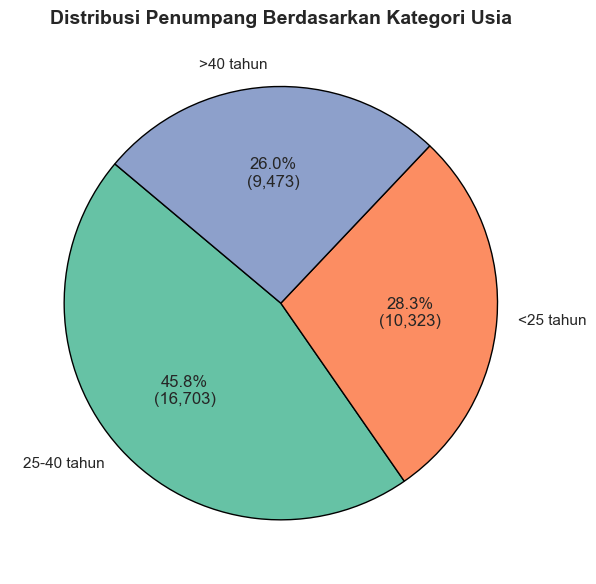

In [100]:
# Hitung frekuensi tiap kategori usia
usia_counts = df_age['Kategori Usia'].value_counts()

# Pie chart
colors = ['#66c2a5', '#fc8d62', '#8da0cb']  # Warna-warna lembut dan berbeda
plt.figure(figsize=(8, 6))
plt.pie(
    usia_counts,
    labels=usia_counts.index,
    autopct=lambda pct: f"{pct:.1f}%\n({int(pct/100.*usia_counts.sum()):,})",
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'black'}
)

plt.title('Distribusi Penumpang Berdasarkan Kategori Usia', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

Dominasi Usia Produktif
1. Kelompok usia 25–40 tahun merupakan penumpang terbanyak (46%), menunjukkan bahwa TransJakarta sangat relevan digunakan oleh masyarakat usia produktif, seperti pekerja kantoran atau profesional muda.

2. Usia < 25 tahun
Sekitar 28% penumpang adalah usia muda, kemungkinan besar pelajar, mahasiswa, atau first jobber. Ini menunjukkan potensi besar untuk program seperti:
    - “Berangkat Sekolah/Kuliah Bersama TransJakarta”
    - Kerja sama dengan sekolah dan kampus untuk edukasi dan integrasi layanan

3. Usia > 40 tahun
Meski paling kecil proporsinya (26%), kelompok ini tetap signifikan dan menunjukkan bahwa layanan TransJakarta digunakan juga oleh kalangan dewasa hingga lansia. Ini bisa dimanfaatkan untuk:
    - Menyediakan fasilitas ramah lansia di halte dan bus
    - Pelatihan sopir agar peka terhadap kebutuhan penumpang usia tua
    - Kolaborasi dengan Dinas Sosial atau komunitas lansia

In [101]:
# Hitung jumlah penumpang per kategori usia dan koridor
grouped = df_age.groupby(['Kategori Usia', "hour_tapInTime"]).size().reset_index(name='Jumlah Penumpang')

# Ambil top 5 koridor untuk masing-masing kategori usia
top5_per_kategori = grouped.sort_values(['Kategori Usia', 'Jumlah Penumpang'], ascending=[True, False])
top5_per_kategori = top5_per_kategori.groupby('Kategori Usia').head(5)

# Tampilkan hasil
for kategori in labels:
    print(f"\nKategori Usia: {kategori}")
    print(top5_per_kategori[top5_per_kategori['Kategori Usia'] == kategori])


Kategori Usia: <25 tahun
   Kategori Usia  hour_tapInTime  Jumlah Penumpang
1      <25 tahun               6              1572
12     <25 tahun              17              1460
0      <25 tahun               5               943
11     <25 tahun              16               940
3      <25 tahun               8               778

Kategori Usia: 25-40 tahun
   Kategori Usia  hour_tapInTime  Jumlah Penumpang
18   25-40 tahun               6              2593
29   25-40 tahun              17              2427
17   25-40 tahun               5              1471
28   25-40 tahun              16              1470
21   25-40 tahun               9              1298

Kategori Usia: >40 tahun
   Kategori Usia  hour_tapInTime  Jumlah Penumpang
35     >40 tahun               6              1455
46     >40 tahun              17              1394
45     >40 tahun              16               828
34     >40 tahun               5               823
37     >40 tahun               8               729


In [102]:
# Hitung jumlah penumpang per kategori usia dan koridor
grouped = df_age.groupby(['Kategori Usia', 'corridorID',"hour_tapInTime"]).size().reset_index(name='Jumlah Penumpang')

# Ambil top 5 koridor untuk masing-masing kategori usia
top5_per_kategori = grouped.sort_values(['Kategori Usia', 'Jumlah Penumpang'], ascending=[True, False])
top5_per_kategori = top5_per_kategori.groupby('Kategori Usia').head(5)

# Tampilkan hasil
for kategori in labels:
    print(f"\nKategori Usia: {kategori}")
    print(top5_per_kategori[top5_per_kategori['Kategori Usia'] == kategori])



Kategori Usia: <25 tahun
     Kategori Usia corridorID  hour_tapInTime  Jumlah Penumpang
641      <25 tahun         1P              17                27
692      <25 tahun         1T              17                27
3639     <25 tahun        S21               6                27
1100     <25 tahun         5C              17                26
1729     <25 tahun         9D              17                26

Kategori Usia: 25-40 tahun
     Kategori Usia corridorID  hour_tapInTime  Jumlah Penumpang
5764   25-40 tahun     JAK.06               6                41
4472   25-40 tahun         2E               6                37
4982   25-40 tahun         6H               6                37
7056   25-40 tahun       JIS3               6                35
7066   25-40 tahun       JIS3              16                34

Kategori Usia: >40 tahun
      Kategori Usia corridorID  hour_tapInTime  Jumlah Penumpang
9504      >40 tahun     JAK.07               6                34
10269     >40 tahun   

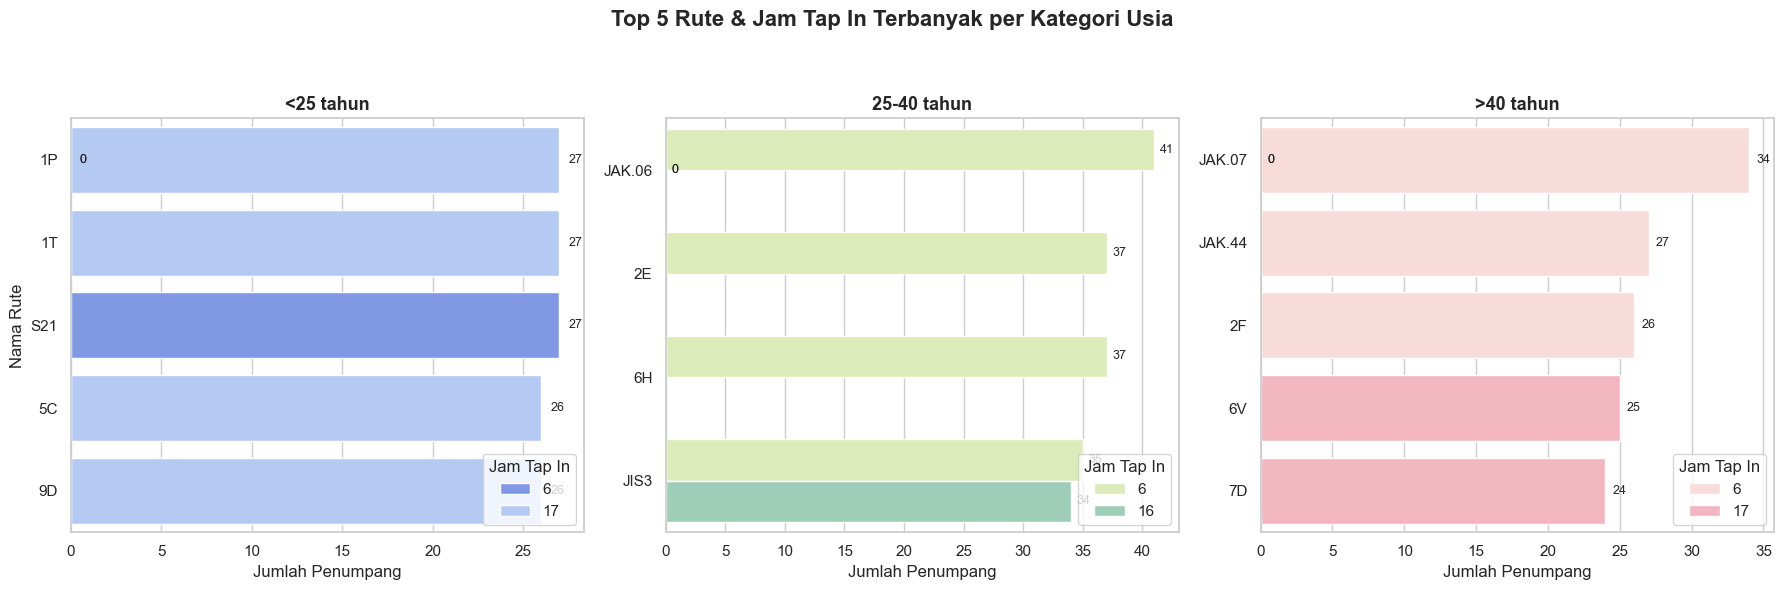

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style visual
sns.set(style="whitegrid")
plt.figure(figsize=(18, 6))

# Warna unik untuk masing-masing kategori
palette1 = sns.color_palette("coolwarm", len(top5_per_kategori[top5_per_kategori['Kategori Usia'] == '<25 tahun']))
palette2 = sns.color_palette("YlGnBu", len(top5_per_kategori[top5_per_kategori['Kategori Usia'] == '25-40 tahun']))
palette3 = sns.color_palette("RdPu", len(top5_per_kategori[top5_per_kategori['Kategori Usia'] == '>40 tahun']))

kategori_list = ['<25 tahun', '25-40 tahun', '>40 tahun']
palette_list = [palette1, palette2, palette3]

for i, kategori in enumerate(kategori_list):
    plt.subplot(1, 3, i+1)
    data_kategori = top5_per_kategori[top5_per_kategori['Kategori Usia'] == kategori]
    barplot = sns.barplot(
        data=data_kategori,
        y='corridorID',
        x='Jumlah Penumpang',
        hue='hour_tapInTime',
        palette=palette_list[i]
    )
    
    plt.title(f'{kategori}', fontsize=13, fontweight='bold')
    plt.xlabel('Jumlah Penumpang')
    if i == 0:
        plt.ylabel('Nama Rute')
    else:
        plt.ylabel('')
    
    plt.legend(title='Jam Tap In', loc='lower right')

    # Tambahkan anotasi jumlah penumpang di setiap bar
    for p in barplot.patches:
        width = p.get_width()
        plt.text(width + 0.5, 
                 p.get_y() + p.get_height() / 2,
                 f'{int(width)}',
                 ha='left', va='center', fontsize=9)

# Judul utama
plt.suptitle("Top 5 Rute & Jam Tap In Terbanyak per Kategori Usia", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


1. Usia < 25
    - Waktu padat pagi (06.00–09.00) & sore (18.00) menunjukkan bahwa banyak anak muda berangkat dan pulang sekolah/kampus.
    - Koridor 1P, 5C, dan 4C serta Mikrotrans (JAK.120) populer di kalangan ini.
    - Potensi program "Berangkat Sekolah/Kuliah Bareng TransJakarta" bisa difokuskan di koridor & jam ini.

2. Usia 25-40
    - Kelompok usia produktif ini paling aktif di jam sibuk (06.00–08.00 & 18.00), jelas terlihat aktivitas kerja.
    - Koridor seperti B14, JIS3, 6N, JAK.06 kemungkinan besar adalah koridor kantor/perumahan.
    - Fokus peningkatan kenyamanan & ketepatan waktu pada jam sibuk penting untuk mereka.

3. Usia > 40
    - Grup ini aktif di jam yang mirip usia produktif, tapi frekuensinya sedikit lebih rendah.
    - Koridor seperti 2F, 6V, 9D dan Mikrotrans (JAK.44) penting untuk pelayanan ramah lansia.
    - Perlu peningkatan aksesibilitas halte, informasi visual/audio yang ramah pengguna senior.

# `Kesimpulan`


1. Perilaku Penumpang Berdasarkan Waktu
    - Jam paling sibuk terjadi pada pagi hari (05:00–07:00) dan sore hari (16:00–18:00).
    - Ini berlaku untuk seluruh jenis layanan (BRT, Non-BRT, Mikrotrans, Royaltrans) dan konsisten pada semua kelompok usia dan gender.
2. Koridor Prioritas
    - Koridor 9D (Pasar Minggu - Tanah Abang) dan JAK.36 (Cilangkap - Cililitan) merupakan koridor dengan volume tertinggi pada pagi dan sore hari.
    - Koridor lain seperti 2E, 8C, 1T, JAK.06, dan S21 juga menunjukkan aktivitas tinggi dan dapat dikategorikan sebagai koridor sekunder prioritas.
3. Segmentasi Berdasarkan Usia dan Gender
    - Usia 25–40 tahun adalah kelompok penumpang terbesar (45,8%), diikuti oleh usia <25 tahun (28,3%) dan >40 tahun (26%).
    - Perempuan menunjukkan volume signifikan, terutama di titik-titik seperti Penjaringan, Tendean, Tanah Abang, Bundaran Senayan, dan Terminal Senen pada jam 06:00 dan 17:00–18:00.
4. Pola Titik Naik dan Turun
    - Titik tap-in populer: Garuda Taman Mini, SMKN 56, Penjaringan, Grand Sahid.
    - Titik tap-out populer: BKN, Bundaran Senayan, Tendean, Terminal Senen, JPO Blok G.
    - Titik-titik ini menunjukkan keterkaitan antara permukiman, perkantoran, pendidikan, dan terminal transit.


# `Rekomendasi`


1. Peningkatan Efisiensi Operasional
    - Terapkan penjadwalan dinamis berdasarkan waktu sibuk dan jalur prioritas.
    - Fokus penambahan armada di jam 05:00–07:00 dan 16:00–18:00 untuk koridor seperti 9D, JAK.36, dan 2E.
2. Penguatan Mikrotrans dan Non-BRT
    - Karena banyak perjalanan berasal dari layanan feeder dan non-BRT, perluasan dan peningkatan kualitas Mikrotrans dan Non-BRT akan meningkatkan aksesibilitas dan kenyamanan.
3. Layanan Ramah Gender
    - Titik-titik seperti Penjaringan, GBK, dan Tendean perlu pencahayaan, CCTV, dan fasilitas keamanan tambahan, terutama di sore dan malam hari.
    - Perluas inisiatif “Zona Aman Perempuan” di halte dan dalam armada.
4. Segmentasi Layanan Berdasarkan Usia
    - <25 tahun: Program "Transjakarta Goes to School/University", kerjasama dengan Dinas Pendidikan.
    - 25–40 tahun: Paket langganan commuter, integrasi layanan kerja (kantor/kawasan industri).
    - \>40 tahun: Fasilitas halte ramah lansia, sosialisasi hak prioritas, dan integrasi dengan layanan kesehatan/jemputan lansia.


In [104]:
# df.to_csv('transjakarta3.csv')

In [ ]:
# df.to_excel('Transjakarta.xlsx')